## Ohad Lavie 209805787
## Ronen Hristoforov 318639028

## About the Dataset

Source: https://archive.ics.uci.edu/dataset/2/adult
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian noninstitutional population of the US. The original dataset contains around 48,000 rows but for faster computation we will be using only 2000 rows in this section.

  <u>Content</u>

- **age**: Age of the person  
- **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked  
- **fnlwgt**: continuous  
- **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool  
- **education-num**: continuous  
- **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse  
- **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces  
- **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried  
- **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black  
- **sex**: Female, Male  
- **capital-gain**: continuous  
- **capital-loss**: continuous  
- **hours-per-week**: continuous  
- **native-country**: Country of origin for the person  

### Imports

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import warnings
warnings.filterwarnings(
    "ignore",
    message="No artists with labels found to put in legend"
)
from ucimlrepo import fetch_ucirepo
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler


### Importing the Data from the source


In [1412]:
'''
This script fetches the Adult Income dataset from the UCI Machine Learning Repository.
It reads the training and test portions, applies necessary preprocessing,
and combines them into a single DataFrame.
'''
'''
# Column names from the UCI page
cols = [
    'age','workclass','fnlwgt','education','education-num',
    'marital-status','occupation','relationship','race','sex',
    'capital-gain','capital-loss','hours-per-week','native-country','income'
]

# URLs for the data files
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

# 1) Training portion
df_train = pd.read_csv(
    data_url,
    names=cols,
    sep=r',\s*',
    engine='python',
    na_values='?'
)

# 2) Test portion (the first row is a header line we skip)
df_test = pd.read_csv(
    test_url,
    names=cols,
    sep=r',\s*',
    engine='python',
    skiprows=1,
    na_values='?'
)

# 3) Concatenate if you want a single DataFrame
df = pd.concat([df_train, df_test], ignore_index=True)

'''

<>:6: SyntaxWarning:

invalid escape sequence '\s'

<>:6: SyntaxWarning:

invalid escape sequence '\s'

/var/folders/w_/k0tpmcyd4kb_g7x40mz6mbjw0000gn/T/ipykernel_72481/3789854424.py:6: SyntaxWarning:

invalid escape sequence '\s'



"\n# Column names from the UCI page\ncols = [\n    'age','workclass','fnlwgt','education','education-num',\n    'marital-status','occupation','relationship','race','sex',\n    'capital-gain','capital-loss','hours-per-week','native-country','income'\n]\n\n# URLs for the data files\ndata_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'\ntest_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'\n\n# 1) Training portion\ndf_train = pd.read_csv(\n    data_url,\n    names=cols,\n    sep=r',\\s*',\n    engine='python',\n    na_values='?'\n)\n\n# 2) Test portion (the first row is a header line we skip)\ndf_test = pd.read_csv(\n    test_url,\n    names=cols,\n    sep=r',\\s*',\n    engine='python',\n    skiprows=1,\n    na_values='?'\n)\n\n# 3) Concatenate if you want a single DataFrame\ndf = pd.concat([df_train, df_test], ignore_index=True)\n\n"

In [1413]:

# 1. Fetch the Adult dataset (ID=2)
adult = fetch_ucirepo(id=2)

# 2. Extract features and target
X = adult.data.features        # pandas DataFrame
y_raw = adult.data.targets         # could be a Series or 1-col DataFrame

# 3. Turn y_raw into a flat Series named “income”


if isinstance(y_raw, pd.DataFrame):
    y = y_raw.iloc[:, 0]           # grab the single column
else:
    y = pd.Series(y_raw)

y.name = 'income'

#concatenate X and y into a single DataFrame
df = pd.concat([X, y], axis=1)



<h1 style="text-align: center;">EDA</h1>

## First look at the Data

In [1414]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [1415]:
df.shape

(48842, 15)

In [1416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


## Data cleaning

### Checking for misssing values

Columns with missing values:
workclass         963
occupation        966
native-country    274
dtype: int64
----------------------
Percentage of missing values per column :
workclass         1.971664
occupation        1.977806
native-country    0.560993
dtype: float64


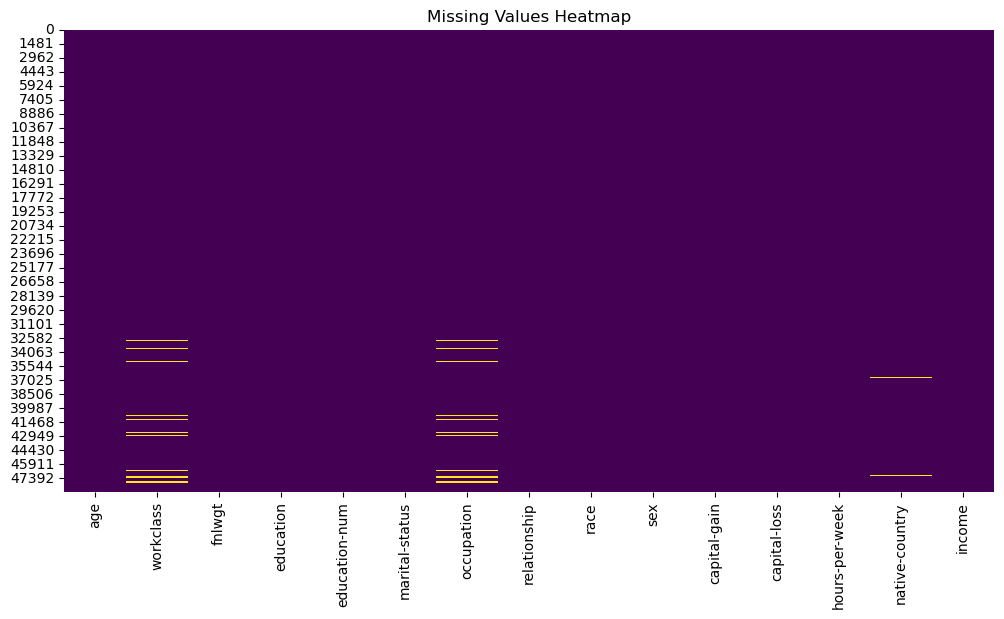

In [1417]:
#print only columns with missing values
print("Columns with missing values:")
missing_columns = df.columns[df.isnull().any()]
num_missing_values = df[missing_columns].isnull().sum()
print(num_missing_values)
print("----------------------")
# to get a better understanding of what percentage of the columns are missing
missing_percentage = df[missing_columns].isnull().sum() / len(df) * 100
print(f"Percentage of missing values per column :\n{missing_percentage}")
# Visualizing the missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

### Based on missing values percentiles, we think that we can infer meaningful data from the missing values.
- By replacing the "null" values with the string "missing" we can hopefully learn from the dataset.
- We think that the missing data is refering to unoccupied people, however we're not certain, as it was not mentioned on the dataset documentation.

- The missing values in the 'native country' column will be dropped as they are very scarce and we believe they dont contribute to any relevant question.

In [1418]:
df['workclass'] = df['workclass'].fillna('missing')
df['occupation'] = df['occupation'].fillna('missing')
#drop the rows with missing values in the 'native-country' column
df = df.dropna(subset=['native-country'])

### Verifying that the Data cleaning worked

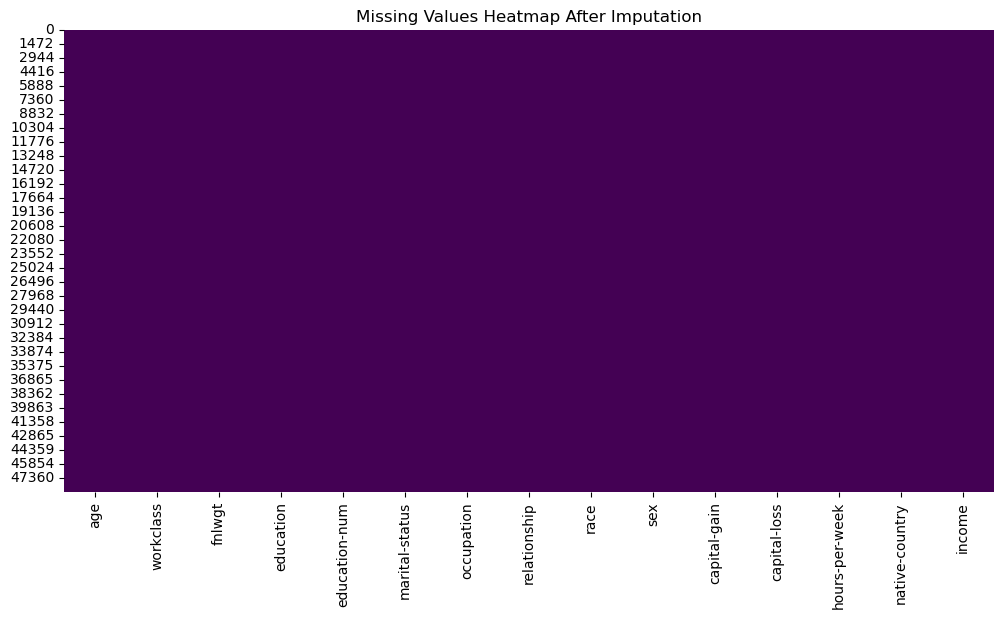

In [1419]:
# checking for missing values and plotting the heatmap again
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap After Imputation')    
plt.show()

Unique values per column :
age                  74
workclass            10
fnlwgt            28424
education            16
education-num        16
marital-status        7
occupation           16
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64


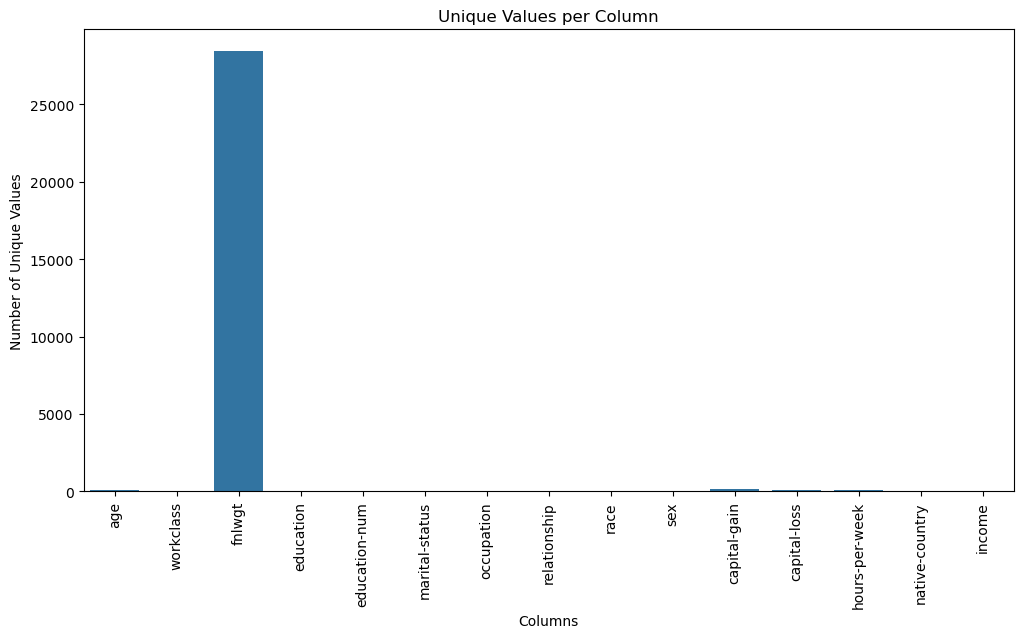

In [ ]:
#We want to see how many unique values are in each column and plot them using countplot
unique_values = df.nunique()
print(f"Unique values per column :\n{unique_values}")
# Plotting the unique values
plt.figure(figsize=(12, 6))
sns.barplot(x=unique_values.index, y=unique_values.values)
plt.xticks(rotation=90)
plt.title('Unique Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.show()

#### The column "fnlwgt" looks odd - it has 28k unique value, we assume that it can be something like  the ID of each person, but then that would mean that there are duplicate rows

In [ ]:
#Lets check the odd values in fnlwgt
df['fnlwgt'].describe()

count    4.856800e+04
mean     1.896385e+05
std      1.056425e+05
min      1.228500e+04
25%      1.175085e+05
50%      1.781570e+05
75%      2.375868e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

<u> Observation :</u>
- Didn't get anything intresting.

 <u>Conclusion :</u>
- We will drop this column as we cannot attain meaningful insights from it.


In [ ]:
 # Dropping the fnlwgt column
df.drop(columns=['fnlwgt'], inplace=True) 
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### We want to inspect the columns where we found missing values : 
- 'workclass' 
- 'occupation'

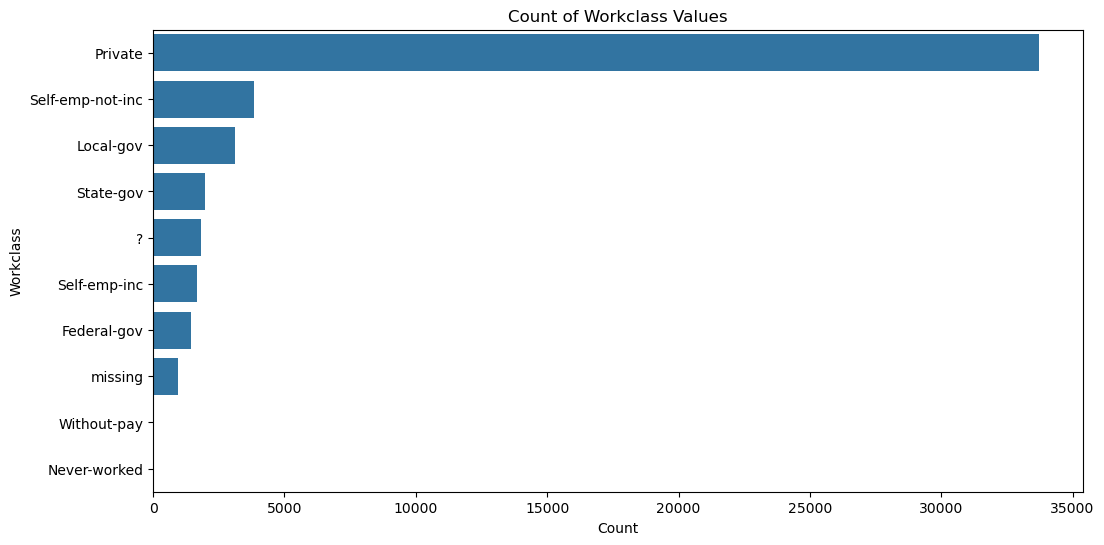

In [ ]:
#Let's see the values  in the 'workclass' column
df['workclass'].value_counts()
#Plot the values in the 'workclass' column
plt.figure(figsize=(12, 6))
sns.countplot(y='workclass', data=df, order=df['workclass'].value_counts().index)
plt.title('Count of Workclass Values')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.show()

<u>Observation:</u>

 We can see that there is an unknown value '?' 

<u>Conclusion :</u>

 We will add this value to 'missing' value.



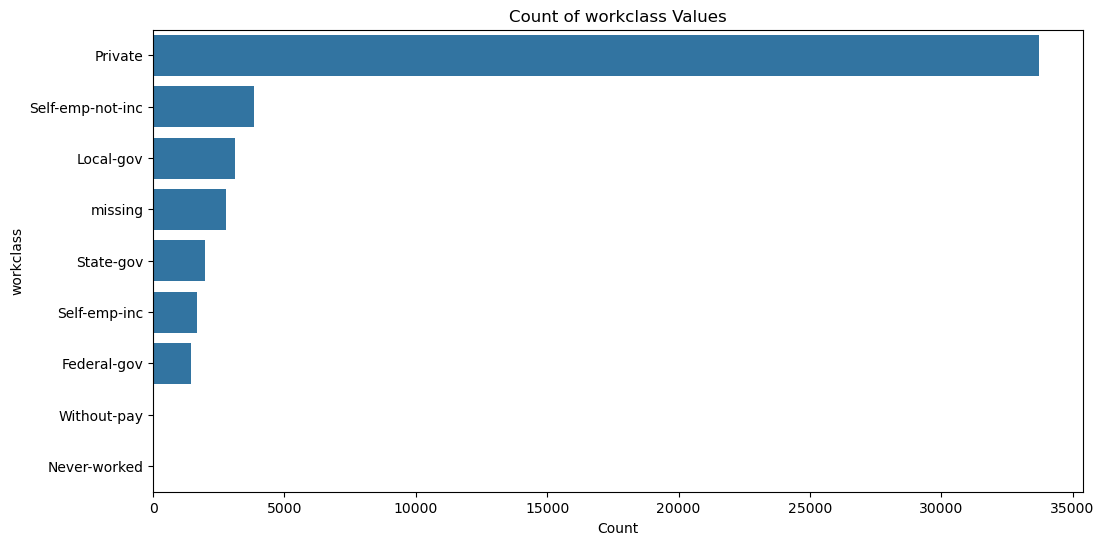

In [ ]:
#Adding the '?' values to the missing values
df['workclass'] = df['workclass'].replace('?', 'missing')
# Creating a function to plott the values in the  column again
def plot_column_values(column_name):
    plt.figure(figsize=(12, 6))
    sns.countplot(y=column_name, data=df, order=df[column_name].value_counts().index)
    plt.title(f'Count of {column_name} Values')
    plt.xlabel('Count')
    plt.ylabel(column_name)
    plt.show()
# Plotting the values in the 'workclass' column again
plot_column_values('workclass')


<h3><u> Observation :</h3></u>

- ~70% of the Data consists of people working in the Private sector.

- There are 3 goverment workclasses : Federal-gov, State-gov, Local-gov

<h3><u> Conclusion :</h3></u>

- We can create one category called Goverment and unite all 3 workclasses as one.

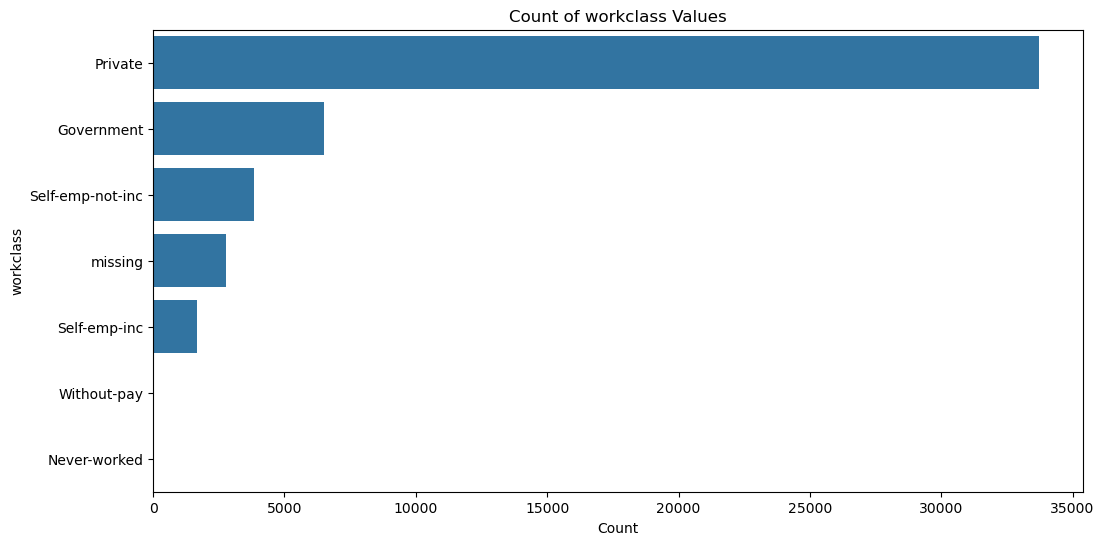

In [ ]:
# Creating a new value called 'Goverment' for the 'workclass' column
df['workclass'] = df['workclass'].replace(['Federal-gov', 'Local-gov', 'State-gov'], 'Government')
# Plotting the values in the 'workclass' column again
plot_column_values('workclass')

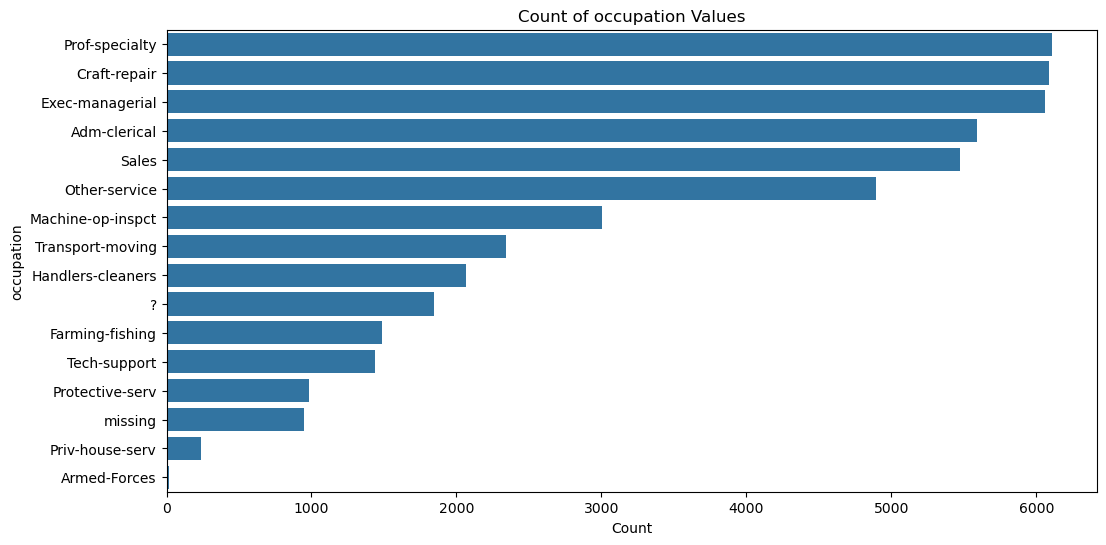

In [ ]:
#Checking if the '?' phenomenon is present in the 'occupation' column and plotting the values in the 'occupation' column
plot_column_values('occupation')

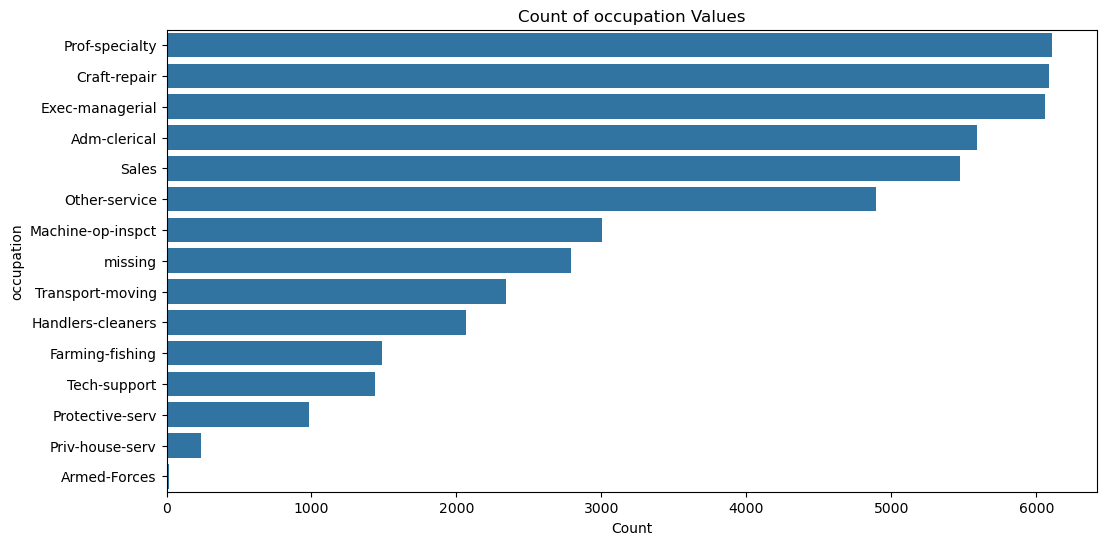

In [ ]:
#Adding the '?' values to the missing values
df['occupation'] = df['occupation'].replace('?', 'missing')
#Plotting the values in the 'occupation' column after replacing '?' with 'missing'
plot_column_values('occupation')

<h3><u> Observation :</h3></u>

- Top Three Occupations Are Almost Tied :
	
	Prof-specialty (~6,200), Craft-repair (~6,100), and Exec-managerial (~6,000) are the most frequent categories, each appearing in roughly 6 K of the ~48 K rows.

	Together, those three alone make up about 37 % of all records. In other words, more than third of the dataset works in professional specialties, crafts/repairs, or executive/managerial roles.
- Mid‐Tier Occupations:
	•	Adm-clerical (~5,500) and Sales (~5,300) also appear very often (each roughly 5.5–5.3 K).
	•	Other-service (~4,800) rounds out the “top six” occupations, meaning nearly half of everyone falls into these six job categories.
- Long Tail of Less Common Jobs
	•	After “Other-service,” counts drop sharply



<h3><u> Conclusion :</h3></u>

- High‐frequency categories (Prof-specialty, Craft-repair, Exec-managerial, Adm-clerical, Sales, Other-service) together account for ~60 % of the data. It might make sense to leave those as distinct dummy variables.

- Rare occupations ( Priv-house-serv, Armed-Forces, and perhaps anything under ~1 % frequency) could be grouped into an “Other” or “Rare” bucket, or you could drop them if they add noise.

In [ ]:
#Checking if there are any '?' values in our dataframe
df[df.isin(['?']).any(axis=1)].head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,missing,7th-8th,4,Married-spouse-absent,missing,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K


We can see that the '?' values are shown in the 'native-country' column, which makes sense. We will replace it with 'missing' as we did in the last columns we checked, and continue to search for more '?' values in other columns

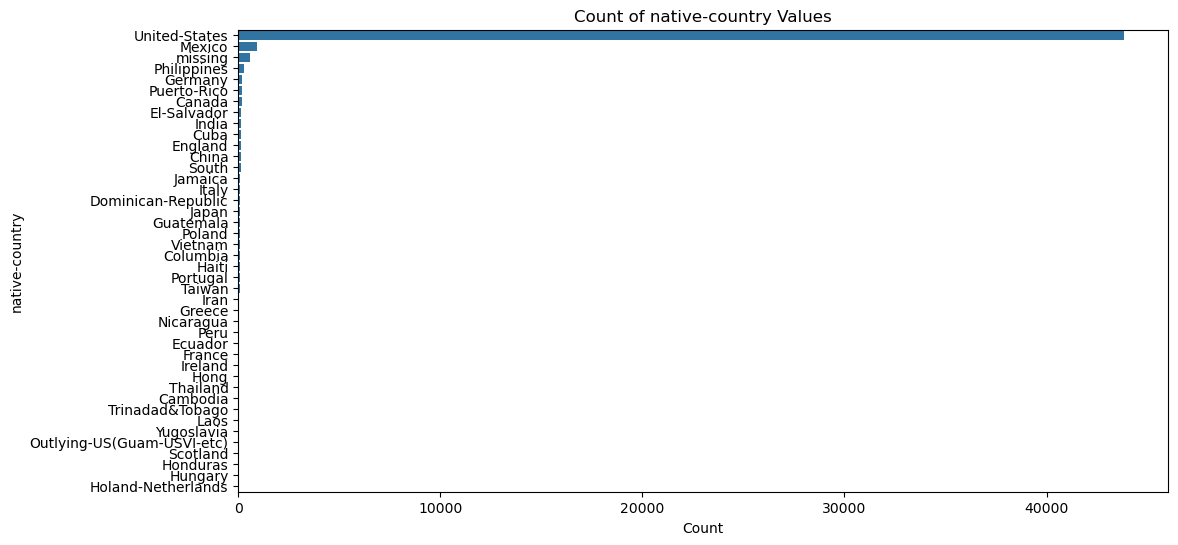

In [ ]:
df.replace({'native-country': {'?': 'missing'}}, inplace=True)
#plotting the values in the 'native-country' column
plot_column_values('native-country')

<h3><u> Observation :</h3></u>

- ~91% of the data consists of people from the US

- ~2% of the data consists of people from Mexico

- The rest of the countries have less than 0.6% each of the data.

In [ ]:
#Checking if there are any '?' values in a non 'native country' column. If so we will replace them with 'missing'

# Check for '?' values in the entire DataFrame
mask = df.isin(['?'])

# Drop the 'native_country' column from the mask
mask_excl_country = mask.drop(columns=['native-country'])

# Check if any '?' values exist outside 'native_country'
has_question_marks_elsewhere = mask_excl_country.any().any()

print("Are there any '?' outside 'native-country': ", has_question_marks_elsewhere)

Are there any '?' outside 'native-country'? False


In [1431]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,48568.000000,48568.000000,48568.000000,48568.000000,48568.000000
mean,38.642295,10.073608,1075.908726,87.741414,40.424704
std,13.714365,2.568636,7430.021192,403.581741,12.391966
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


<u><h2>Observation:</u></h2>

- The mean age is around 38.
- Median of education num is 10 meanning.

- We can see the there are no 'anomalie' values like age > 120 or a negative capital-gain which is a good sign that our data is clean.

### Now we know that our data is clean of missing or unidentified Data.

### There are 2 columns with education, maybe 'education-num' is the numerical column of education ?

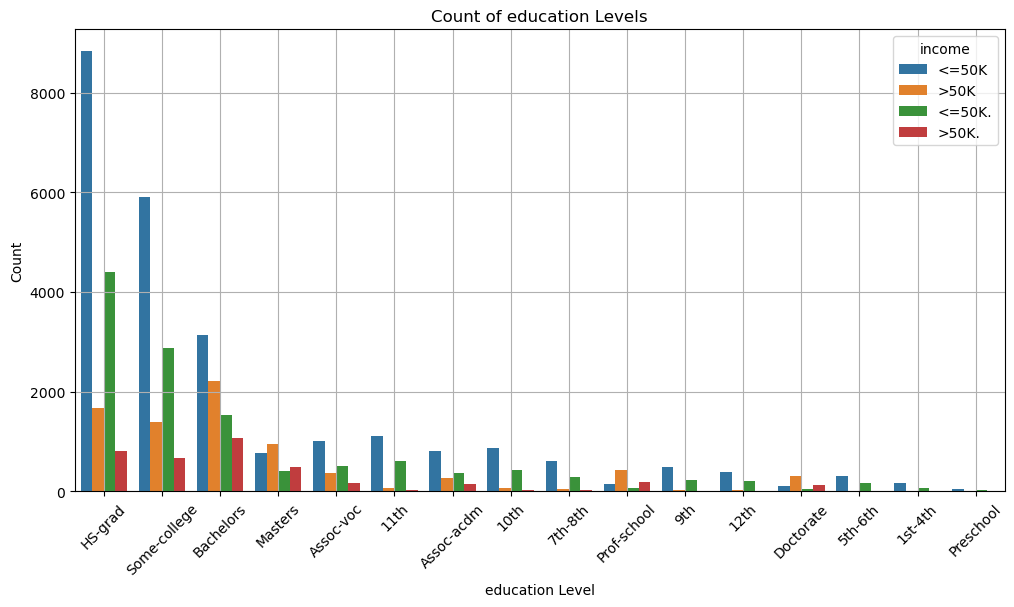

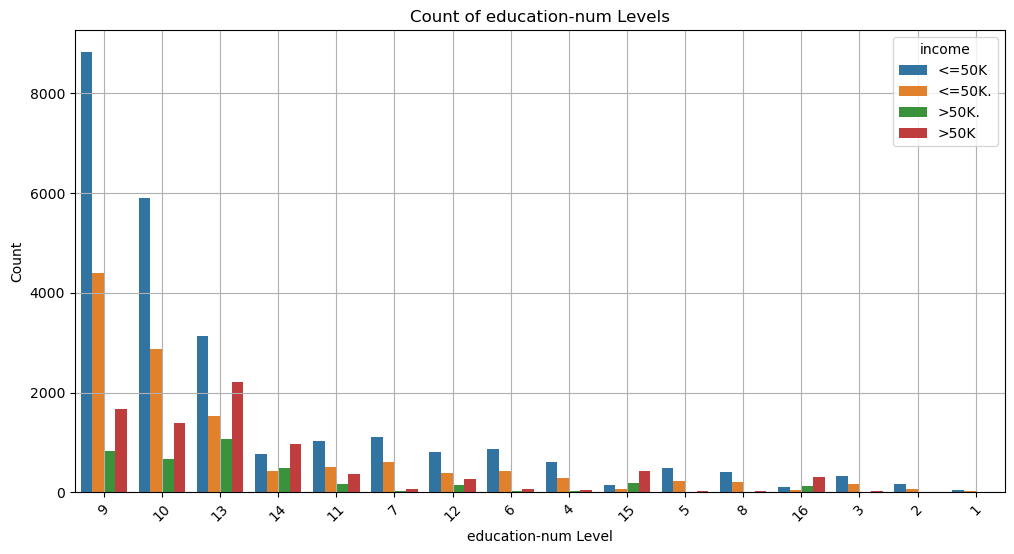

In [ ]:
# We want to see if there are any correllations bwtween 'education-num' and 'education'
# Let's make a function to plot the 'education' column
def plot_column_distribution(column_name):
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column_name, data=df, order=df[column_name].value_counts().index,hue='income')
    plt.title(f'Count of {column_name} Levels')
    plt.ylabel('Count')
    plt.xlabel(f'{column_name} Level')
    plt.xticks(rotation=45)
    plt.legend(title='income', loc='upper right')
    plt.grid(True)
    plt.show()
# Plotting the 'education' column
plot_column_distribution('education')
# Let's plot the 'education-num' column
plot_column_distribution('education-num')

<u><h2>Observation:</u></h2>

There are 4 values to 'income', 2 of which are redundant 

<u><h2>Conclusion:</u></h2>

We will unite them.

In [ ]:
#Let's union the '<=50k' and '<=50k.' into one value
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})
df['income'].value_counts()

income
<=50K    36955
>50K     11613
Name: count, dtype: int64

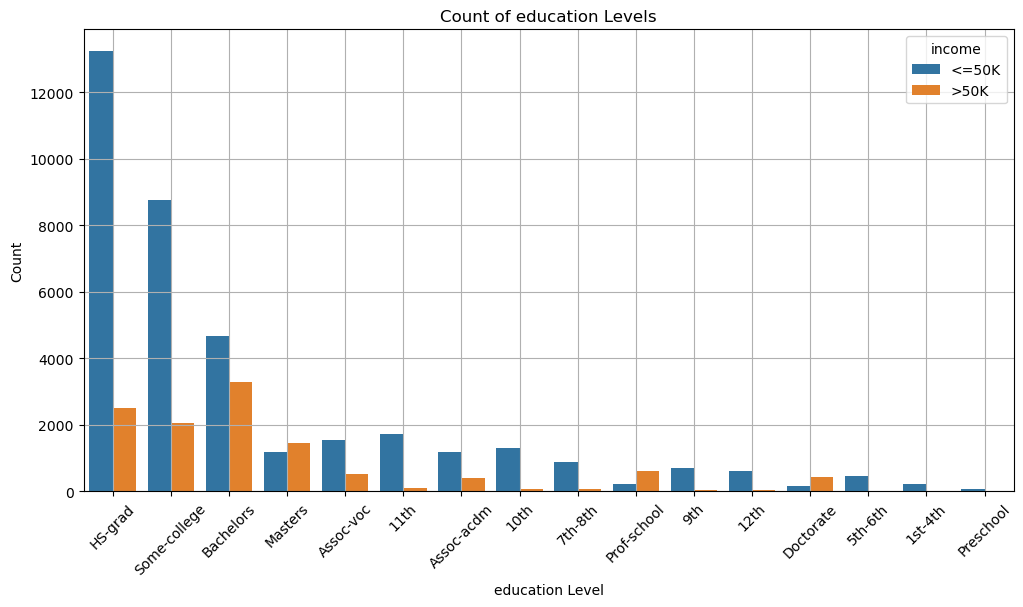

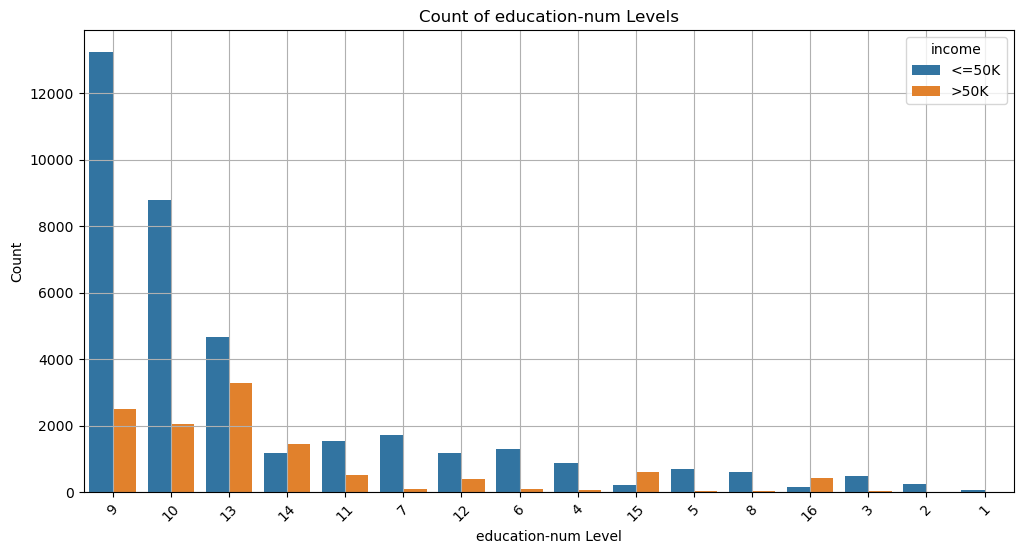

In [ ]:
# Let's plot the 'education' column
plot_column_distribution('education')
# Let's plot the 'education-num' column
plot_column_distribution('education-num')

 It seems as though the 2 plots are identical, however the values are placed differently. 
 
 We need to figure out what values align between the 2 plots.

In [1435]:

print(df['education'].value_counts())
print("-------------------------------------------------")
print(df['education-num'].value_counts())

education
HS-grad         15719
Some-college    10827
Bachelors        7960
Masters          2628
Assoc-voc        2054
11th             1808
Assoc-acdm       1591
10th             1384
7th-8th           950
Prof-school       825
9th               753
12th              651
Doctorate         585
5th-6th           505
1st-4th           245
Preschool          83
Name: count, dtype: int64
-------------------------------------------------
education-num
9     15719
10    10827
13     7960
14     2628
11     2054
7      1808
12     1591
6      1384
4       950
15      825
5       753
8       651
16      585
3       505
2       245
1        83
Name: count, dtype: int64


### Now we can see which integer value in 'education-num' matches the value in 'education'


In [ ]:
# Pull out the unique combinations
education_pairs = (
    df[['education', 'education-num']]
      .drop_duplicates()
      .sort_values('education-num')
      .reset_index(drop=True)
)
education_pairs

,education,education-num
0,Preschool,1
1,1st-4th,2
2,5th-6th,3
3,7th-8th,4
4,9th,5
5,10th,6
6,11th,7
7,12th,8
8,HS-grad,9
9,Some-college,10


### To give us more information about the numeric values in education-num, we will create a dictionary and store the values as : {education : education-num}

In [1437]:
#making a dictionary from the unique combinations
education_dict = education_pairs.set_index('education')['education-num'].to_dict()
education_dict

{'Preschool': 1,
 '1st-4th': 2,
 '5th-6th': 3,
 '7th-8th': 4,
 '9th': 5,
 '10th': 6,
 '11th': 7,
 '12th': 8,
 'HS-grad': 9,
 'Some-college': 10,
 'Assoc-voc': 11,
 'Assoc-acdm': 12,
 'Bachelors': 13,
 'Masters': 14,
 'Prof-school': 15,
 'Doctorate': 16}

In [ ]:
#Sorting the education column ordinally based on the education-num column
df['education'] = pd.Categorical(
    df['education'],
    categories=education_pairs['education'],
    ordered=True

)

In [ ]:
# Select the categorical columns as a list
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
# Select the numerical columns as a list
numerical_columns = df.select_dtypes(include=np.number).columns.tolist()
# Analyzing which categorical column we can one-hot encode and which we can label encode
print(f'categorical columns : {categorical_columns}')
print(f'numerical columns : {numerical_columns}')


categorical columns : ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
numerical columns : ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


## Analyzing the categorical columns before we encode them 

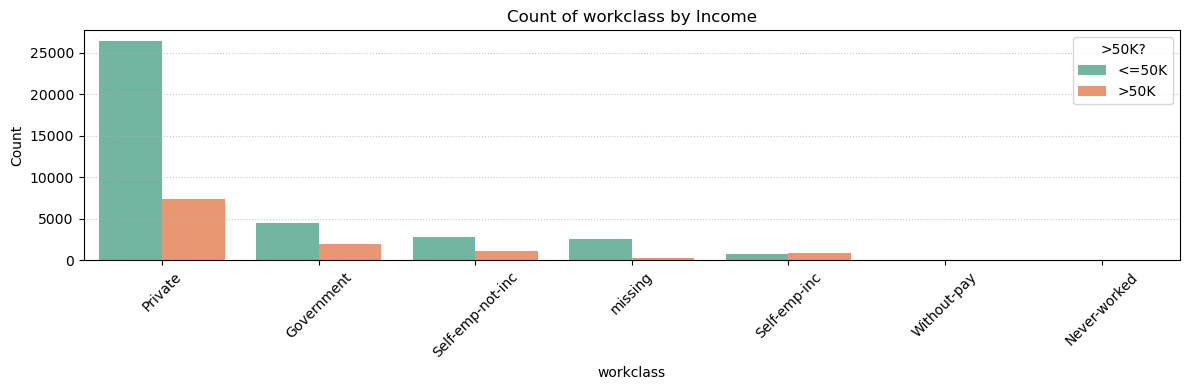

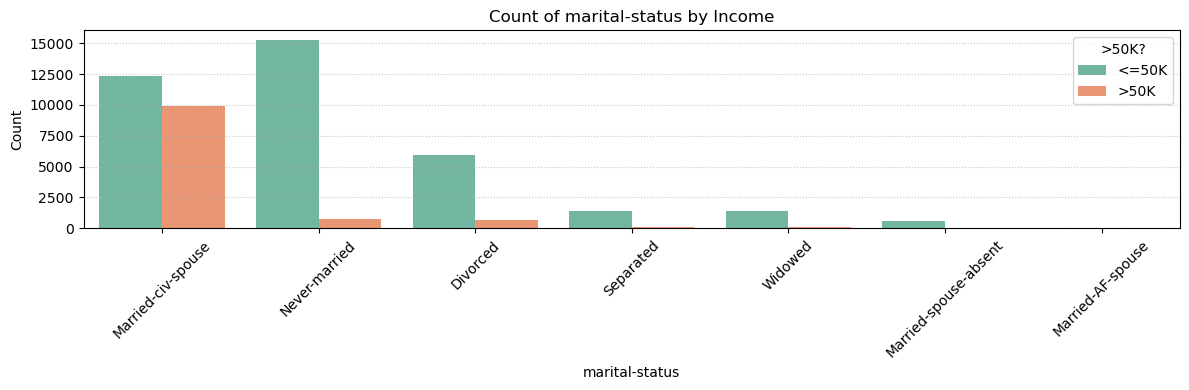

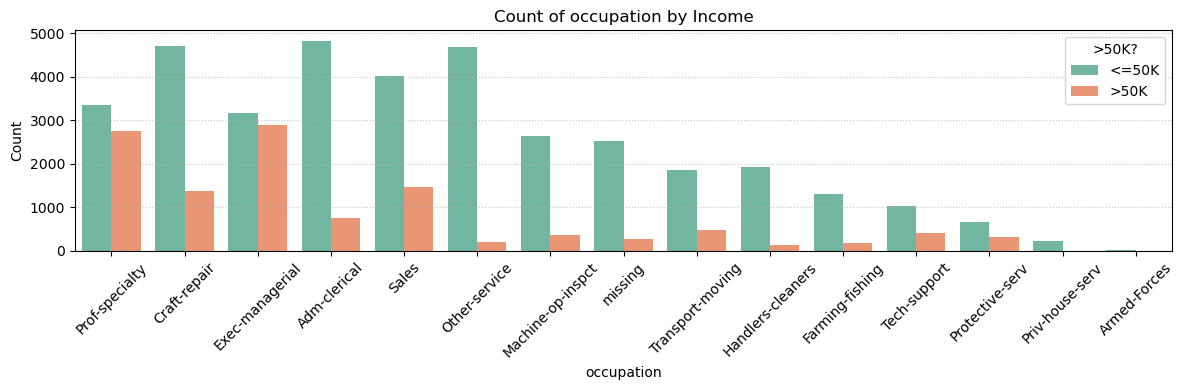

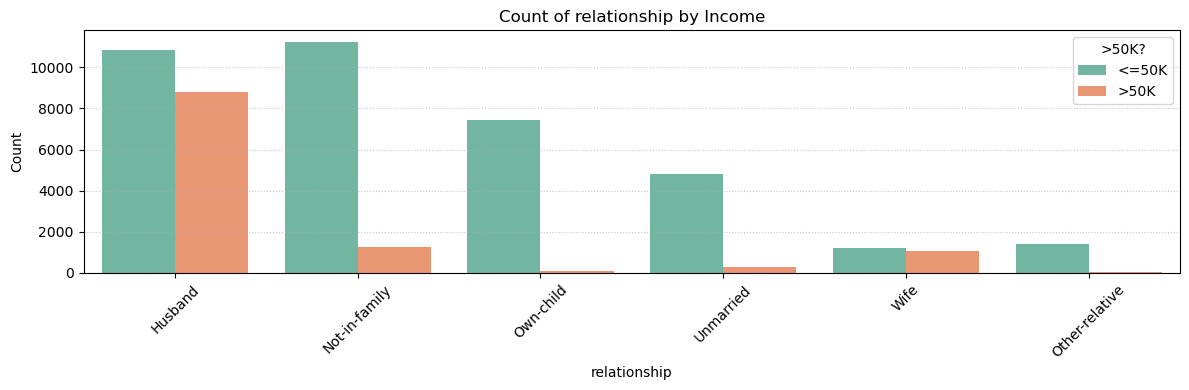

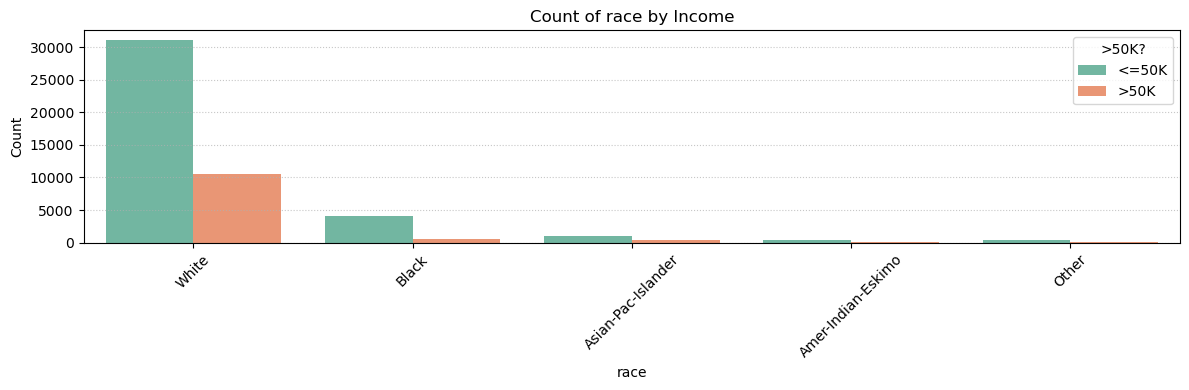

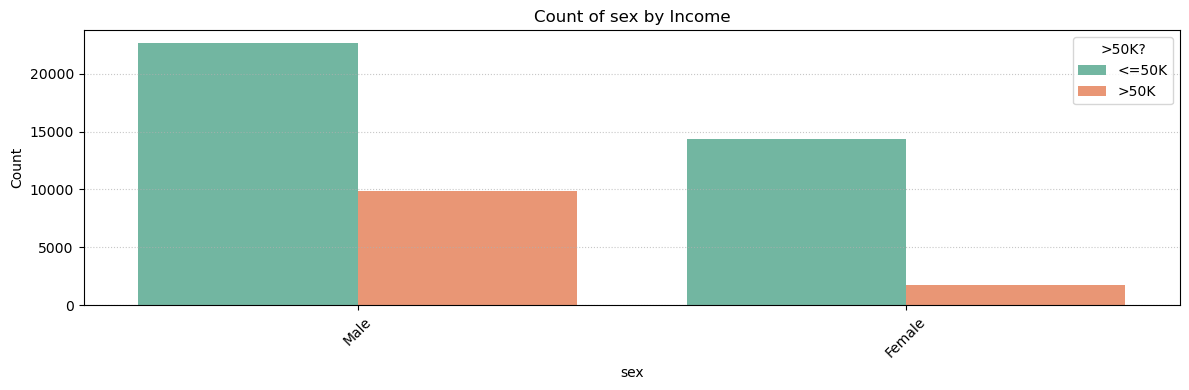

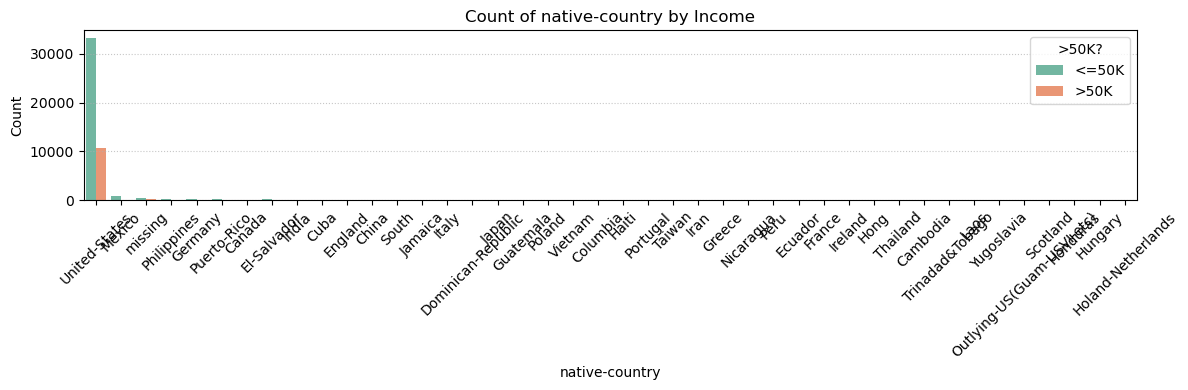

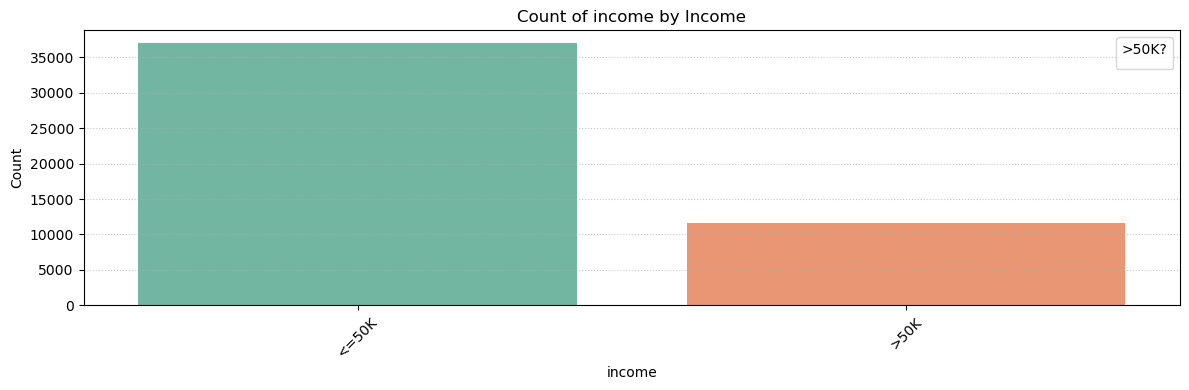

In [ ]:
#Plotting a histogram for each categorical column in categorical columns to see the distribution of values
for column in categorical_columns:
    plt.figure(figsize=(12, 4))
    sns.countplot(
        data=df,
        x=column,
        hue='income',
        order=df[column].value_counts().index,
        palette='Set2'
    )
    plt.title(f'Count of {column} by Income')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='>50K?')
    plt.grid(axis='y', linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()

<u><h2>Observations :</u></h2>
- 76% of the people in the Dataset earn below 50k a year
- There’s a clear imbalance: not only are there more men overall (~67%), but men also dominate the higher‐earning bracket.
- Female representation in the “>$50 K” bin is quite small compared to their male counterparts.
- Exec-manegerial and Prof-specialty have very similar plots, and income distributions.
- The Dataset is consisted mostly of white people.
- 'native-country' column is dominated by one value.

<u><h2>Implications :</u></h2>
- We might explore within‐gender features (e.g. education, occupation, hours‐per‐week) to see what drives the men/women difference.
- Consider plotting, for example, “education‐num by Income separately for each sex” or “hours‐per‐week by Income separately for each sex” to uncover if the disparity is due to differing education levels or work‐hours    distributions.
- Maybe there's a cluster of Executives and Professional workclass? Can be explored.


## Plotting the numerical values

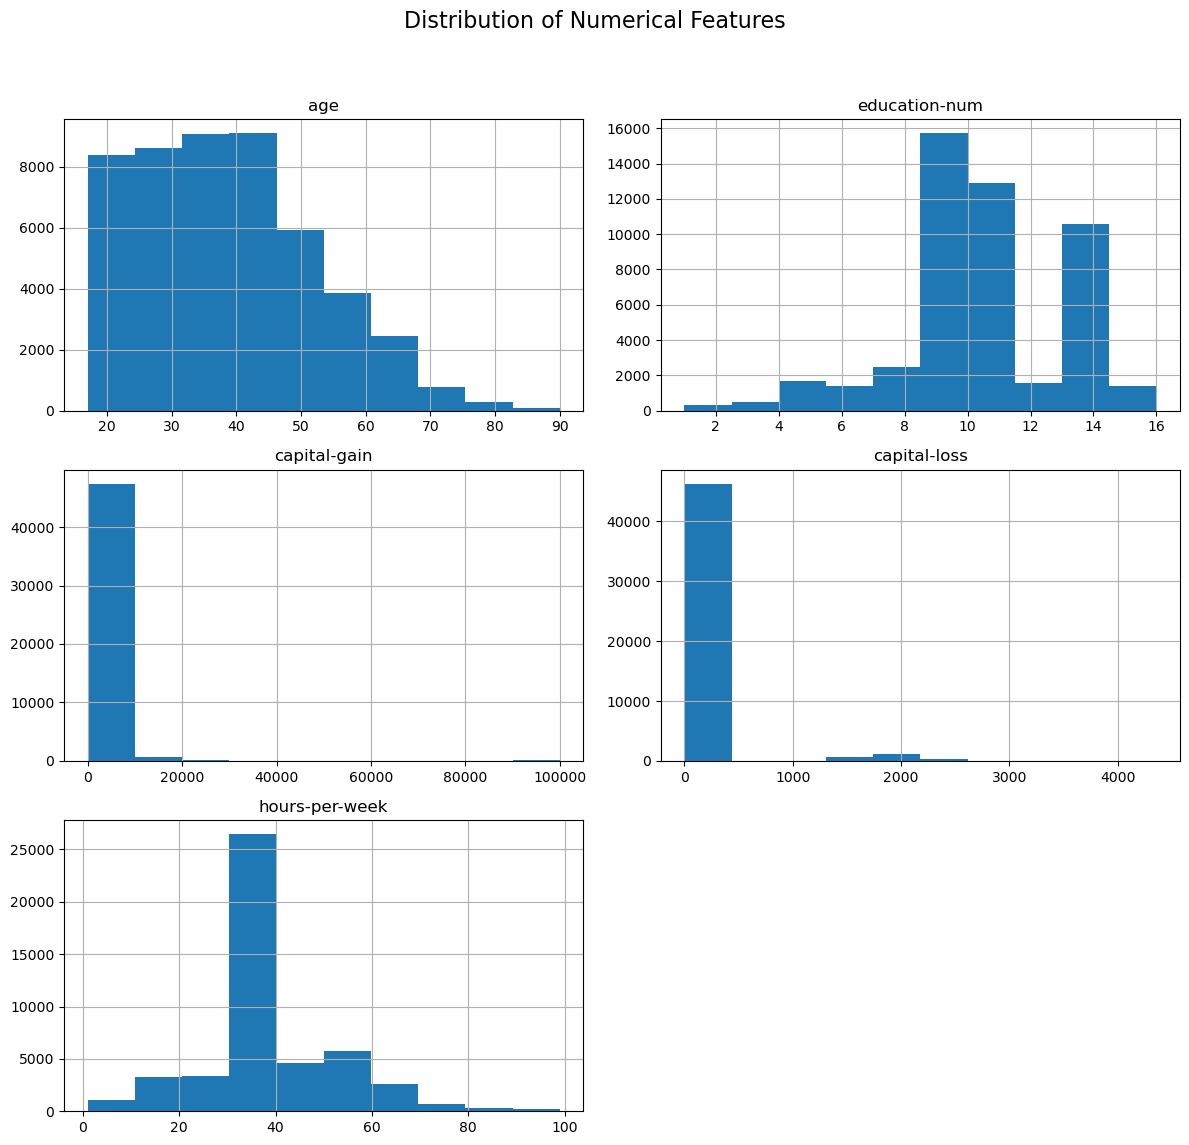

In [ ]:
# Plotting a histogram for each numerical column to see the distribution of values
df[numerical_columns].hist(
    figsize=(12, 12),

)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()

<u><h3>Observations :</u></h3>
- People above 8th grade are  dominating the data.
- Capital-gain and Capital loss are distributed mostly around zero.
- More than Half of the people (~52%) are working between 30-40 hours per week.
- The data consists mostly from people at the ages : 18-60.
- Generally, the data is very skewed.

<u><h3>Implications :</u></h3>

- Due to our data being very skewed, we should consider scaling it using standartization/normalization/another scaling algorithm.


# Multivariate plots
### To further understand our data we will use more visualization tools 

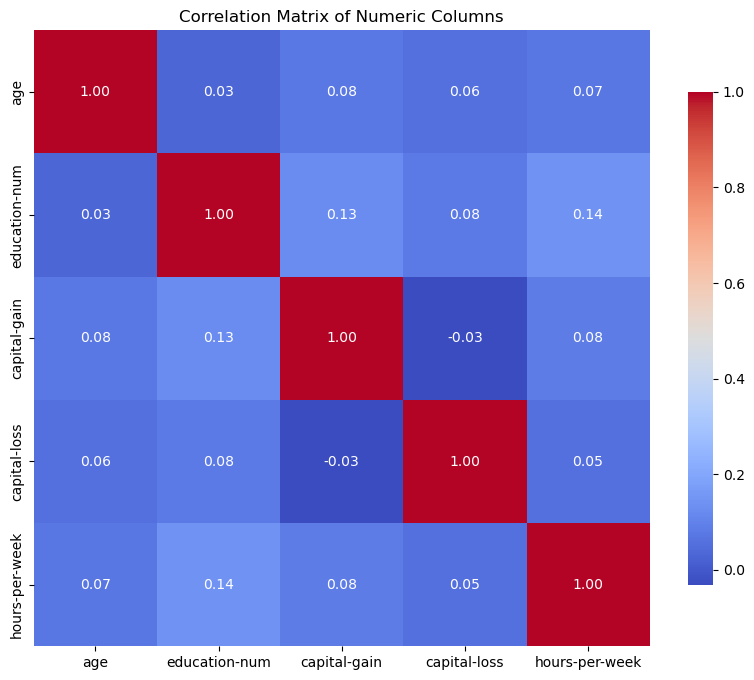

In [1442]:
#plotting the correlation matrix of the numeric columns
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

<h2><u>Observation:</h2></u>
- No seen correlation between numerical columns.


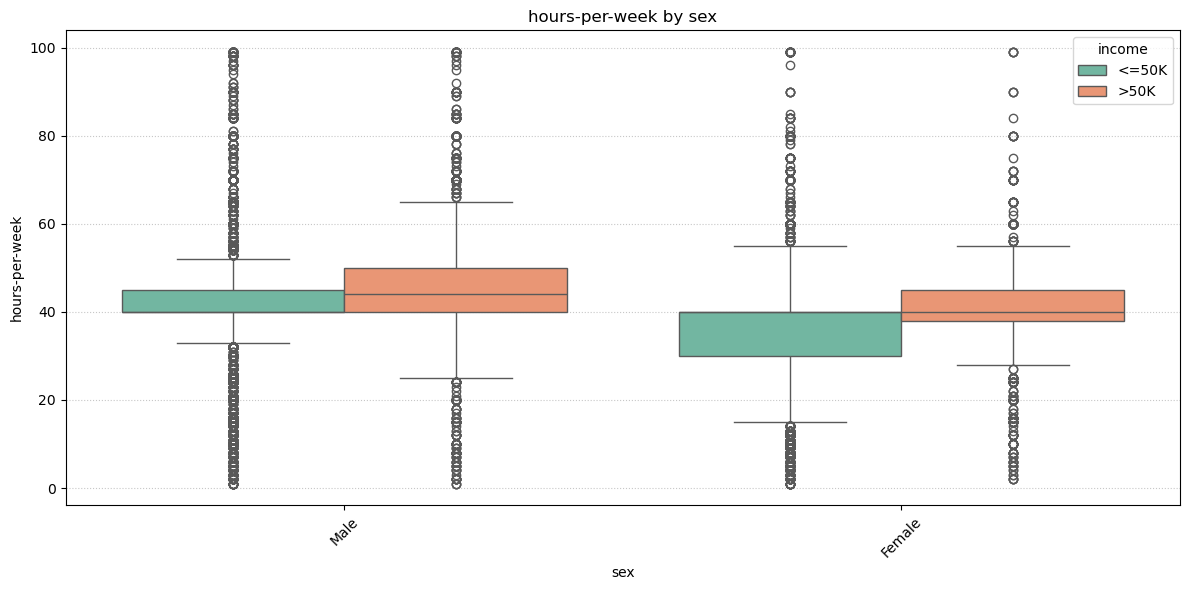

In [ ]:
# writing a function for a numerical vs categorical catplot
def numerical_vs_categorical_catplot(numerical_col, categorical_col, hue_col='income'):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=categorical_col, y=numerical_col, data=df,hue=hue_col, palette='Set2')
    plt.title(f'{numerical_col} by {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel(numerical_col)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()
# Plotting numerical vs categorical features
numerical_vs_categorical_catplot('hours-per-week', 'sex')

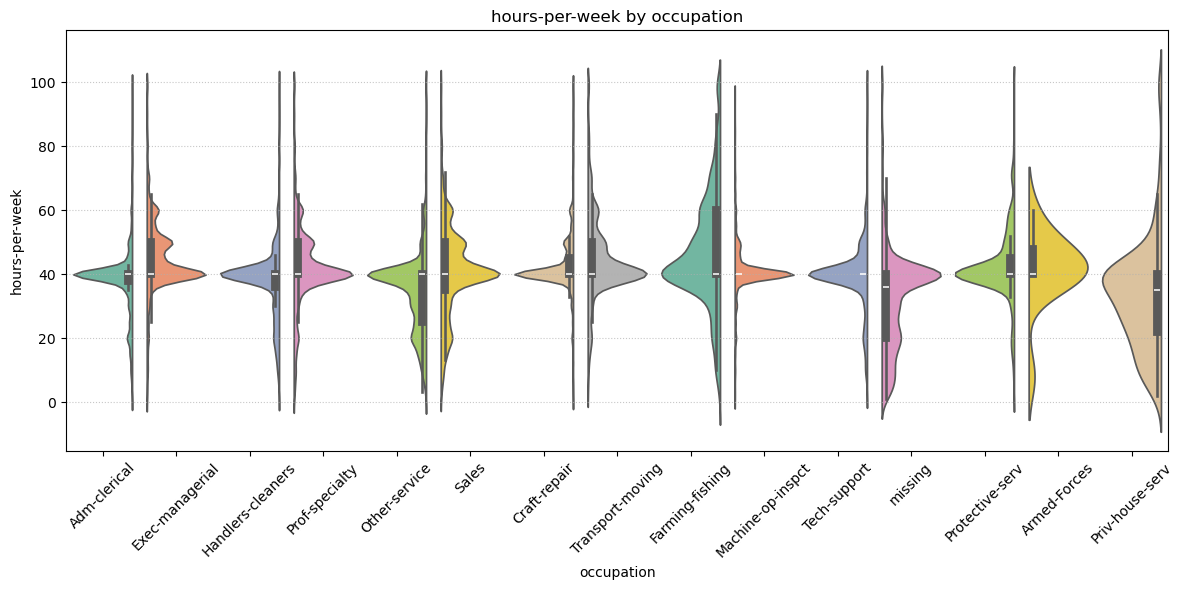

In [ ]:
# Writing a function to plot numerical vs categorical features using a violin plot
def numerical_vs_categorical_violinplot(numerical_col, categorical_col):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=categorical_col, y=numerical_col, data=df, hue=categorical_col, split=True, palette='Set2')
    plt.title(f'{numerical_col} by {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel(numerical_col)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()

numerical_vs_categorical_violinplot('hours-per-week', 'occupation')

<h2><u>Observations:</h2></u>

- 	Feature Engineering
	•	We can  create a new feature called “hour‐type”:
	1.	Part-time (< 30 hrs),
	2.	Full-time (30–45 hrs),
	3.	Overtime (45–60 hrs),
	4.	Extreme (60+ hrs).
	
	•	Then examine how each workclass falls into these hour‐type buckets. For instance, most state-gov workers would land in “Full-time,” while many self-emp-inc workers are in “Overtime” or “Extreme.”
	•	We can  create a new feature called “Education-group”:
- Grouping Rare Categories
	•	We can group together “Without-pay,” “Missing,” and “Never-worked” into a single “Unknown” or “Other” category (since none of those have a clear, tight distribution).
	•	For modeling, that eliminates noise and ensures your clusters or classifiers aren’t skewed by erratic “misc” data.


In [ ]:
#Feature engineering - creating new feature called hour-type based on hours-per-week
def hour_type(hours):
    if hours < 30:
        return 'Part-time'
    elif 30 <= hours < 45:  
        return 'Full-time'
    elif 45<= hours <= 60:
        return 'Over-time'
    else:
        return 'Extreme'
# Apply the function to create a new column that categorizes hours-per-week ordinally from part-time to extreme
df['hour-type'] = df['hours-per-week'].apply(hour_type)
# Categorize 'hour-type' column ordinally
hour_type_order = ['Extreme','Over-time', 'Full-time', 'Part-time' ]
# Convert 'hour-type' to a categorical type with the specified order
df['hour-type'] = pd.Categorical(df['hour-type'], categories=hour_type_order, ordered=True)


In [ ]:
# Grouping “Without-pay,” “Missing,” and “Never-worked” into a single  “Other” category in the workclass column
df['workclass'] = df['workclass'].replace(['Without-pay', 'missing', 'Never-worked'], 'Other')

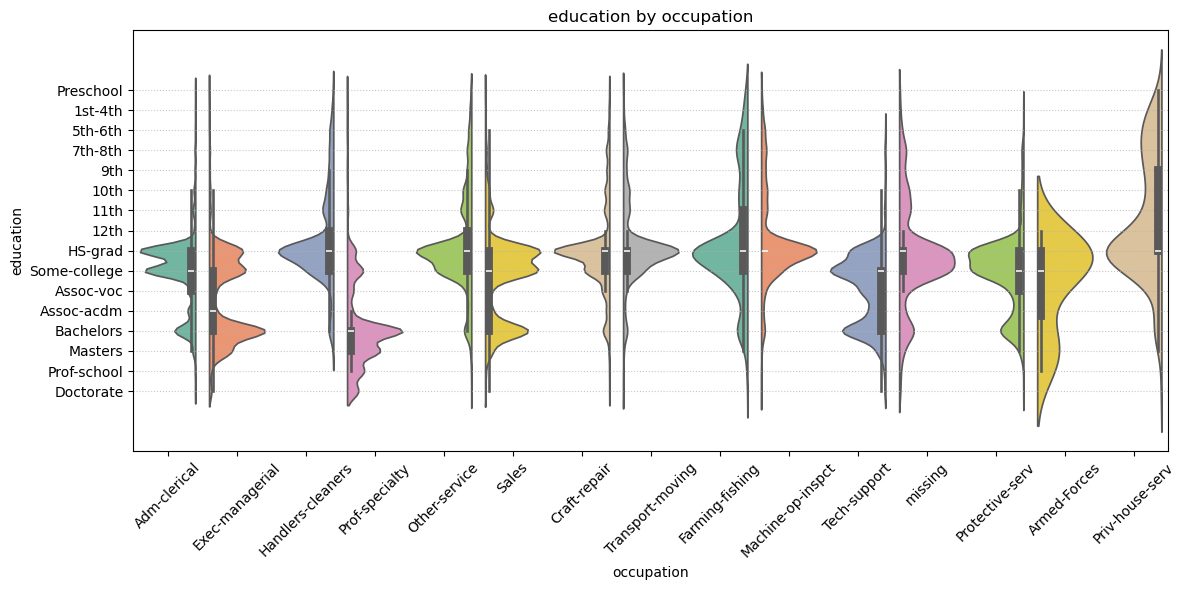

In [1470]:
numerical_vs_categorical_violinplot('education', 'occupation')

<h2><u>Observations:</h2></u>


- Low-education roles (Preschool–12th): Predominantly appear in Handlers-cleaners, Machine-op-inspct, and Transport-moving, with very thin densities in Exec-managerial and Prof-specialty.

- HS-grad: Found across all occupations but peaks in Sales, Other-service, and Adm-clerical, reflecting entry-level or administrative positions.

- Some-college/Associate (Some-college–Assoc-acdm/voc): Concentrated in Private, Exec-managerial, Sales, and Transport-moving, indicating that many mid-level roles require some post-secondary education.

- Bachelor’s or Higher: Densest in Exec-managerial, Prof-specialty, and Protective-serv, with a long right tail into Doctorate at Prof-specialty.

- Missing (Unknown education): Sparse noise across all occupations—should be treated as “Unknown” or imputed.

<h2><u>Implications:</h2></u>
Education and occupation correlate strongly:

- Professional/Managerial roles almost exclusively require Bachelor’s or higher.

- Blue-collar/Trade occupations (Machine-op, Handlers, Transport) skew lower (≤ HS or Some-college).

- Service roles (Sales, Other-service) span HS-grad through Bachelor’s.

<u>Feature engineering :</u>

We can encode an education_level feature , then incorporate that alongside occupation to create joint feature interactions:
1. Less than HS : Preschool, 1st-4th, 5th-6th, 7th-8th, 9th, 10th, 11th, 12th
2. HS Graduate : HS-grad
3. Some College / Assoc : Some-college, Assoc-voc, Assoc-acdm.
4. Bachelor’s or Higher : Bachelors, Masters, Prof-school, Doctorate.

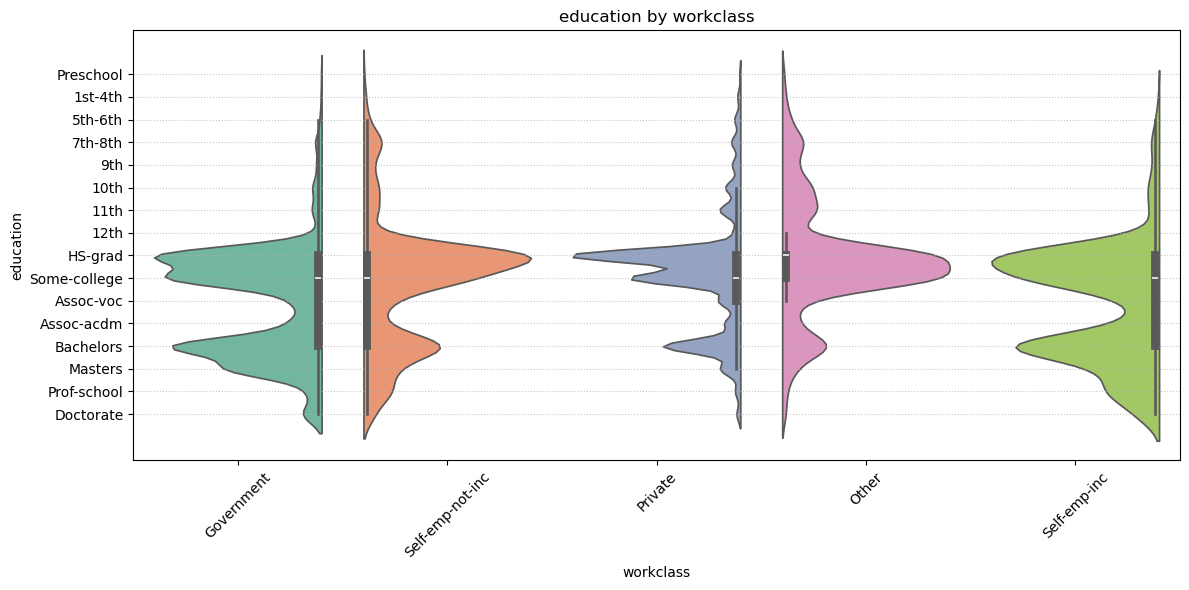

In [ ]:
numerical_vs_categorical_violinplot('education', 'workclass')

<h2><u>Observations:</h2></u>

- Self-emp-inc (incorporated business owners) skew heavily toward Bachelor’s or Higher, with substantial density at Masters and some Doctorate, and very few in the <HS categories.
- Government workers have a tight concentration at HS-grad and Bachelors, with a median around HS-grad–Some-college. Very few have below HS or advanced degrees.
- Private sector has 2 peaks : a large peak at HS-grad/Some-college and a second peak at Bachelors, indicating many entry-to-mid-level education roles plus a professional subset.
- Other (Missing/Without-pay/Never-worked) is spread across nearly all education levels, peaking at HS-grad but with noise—another sign that this bucket is noisy. 

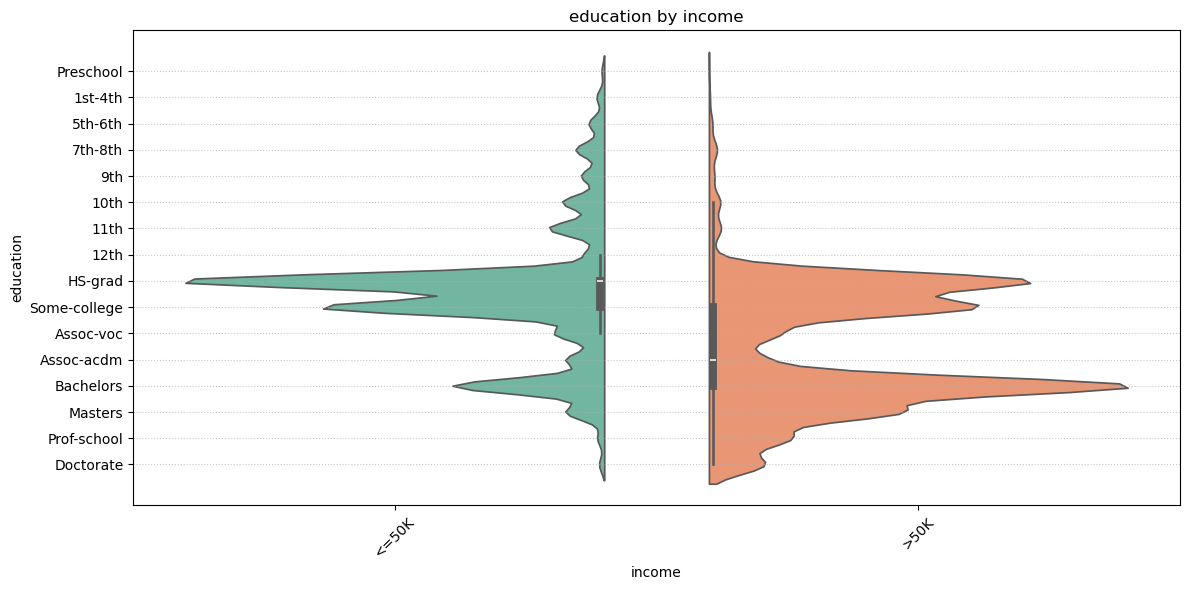

In [1449]:
# Plotting numerical vs categorical features using violin plots
numerical_vs_categorical_violinplot('education', 'income')

<h2><u>Observations:</h2></u>

- Low-income (<=50K): The violin is heavily weighted toward HS-grad and Some-college, with a median at HS-grad (9). Minor densities appear at Associate and Bachelor’s levels, but advanced degrees are extremely rare.

- High-income (>50K): The distribution shifts right dramatically. The peak density moves to Bachelors and Masters, with a long tail into Prof-school and Doctorate. The median education level for >50K is around Bachelors (13).

- Gap between groups: There is almost no overlap at the highest education tiers—doctoral and professional school graduates are virtually all in the >50K bracket, while HS-grad and below are almost exclusively <=50K.

<h2><u>Implications:</h2></u>
- Education level is a clear seperator of income classes, can be helpfull for clustering.




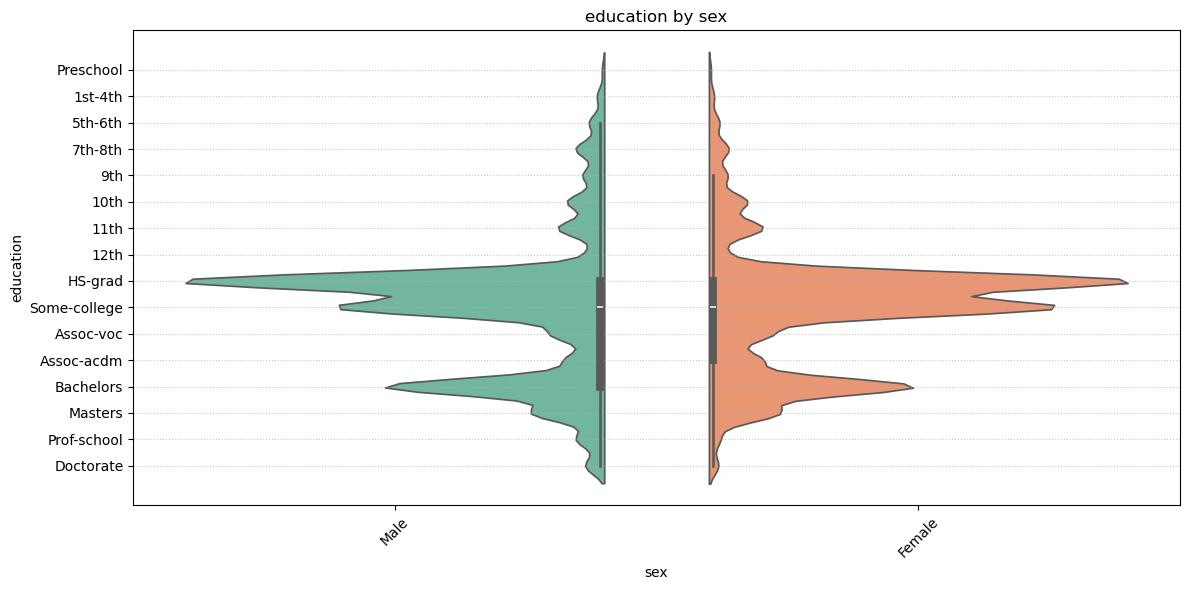

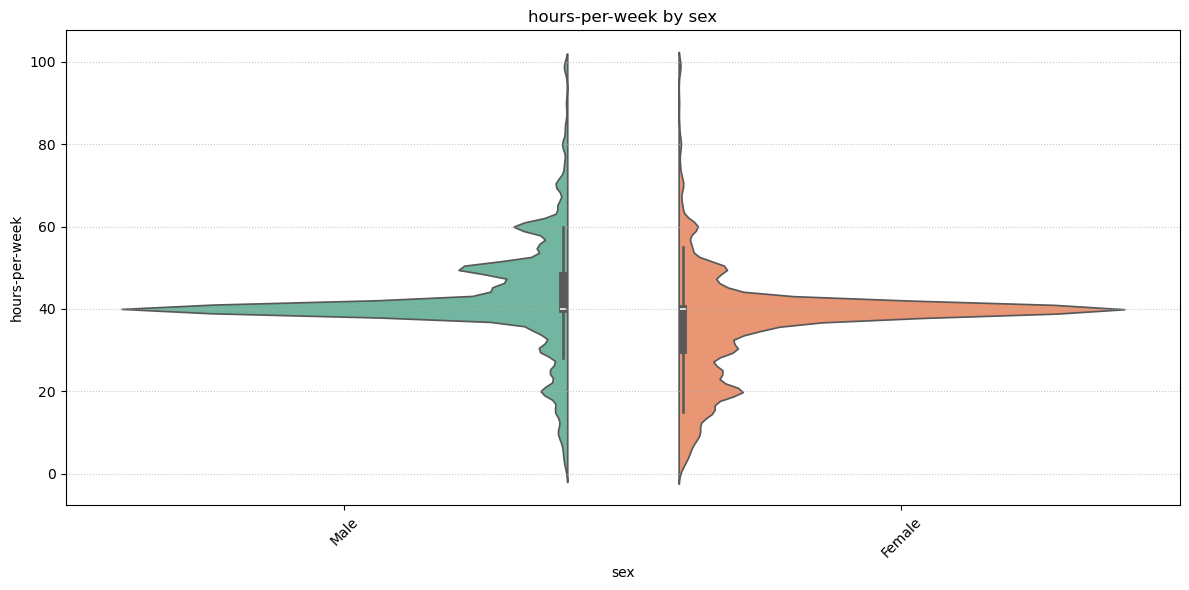

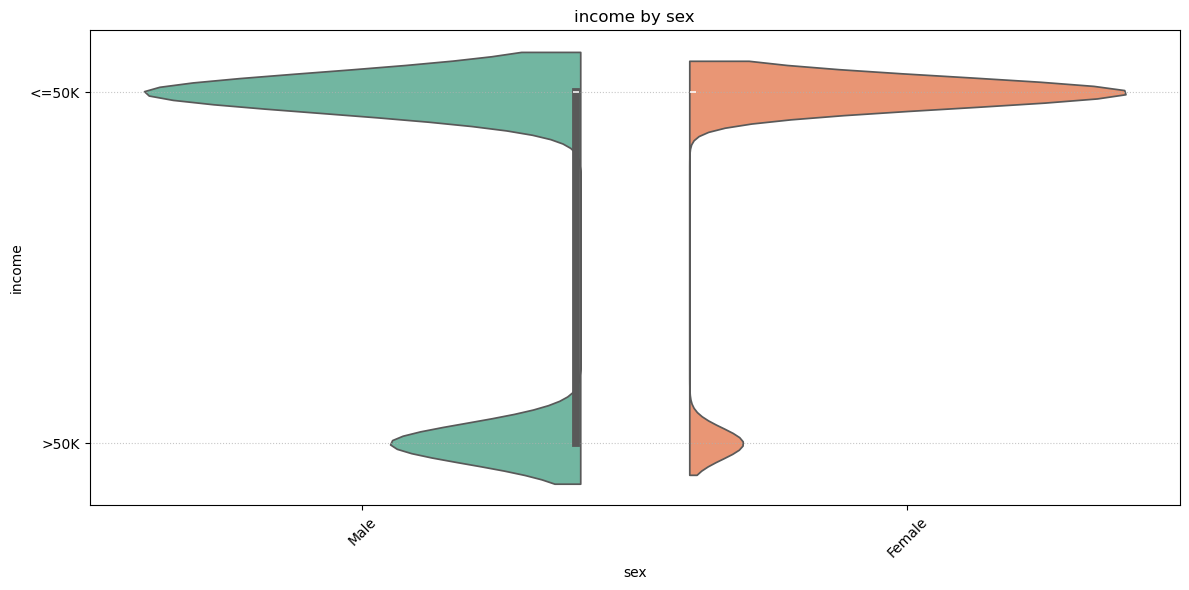

In [1450]:
numerical_vs_categorical_violinplot('education', 'sex')
numerical_vs_categorical_violinplot('hours-per-week', 'sex')
numerical_vs_categorical_violinplot('income', 'sex')

<h2><u>Observations:</h2></u>

- Men and Women have almost the same violin plot for education levels, this means the men and women are equally educated in our data. This insight can be very helpfull
- Men and Women have almmost identical violin plots for hour per week , but more men have income >50k...
- We can further investigate what makes such difference...

## Creating an Education-group column as we implied earlier, for feature engineering purposes.

In [ ]:
# Mapping education levels to education-group
education_to_group = {
    # Less than HS
    'Preschool':               'Less than HS',
    '1st-4th':                 'Less than HS',
    '5th-6th':                 'Less than HS',
    '7th-8th':                 'Less than HS',
    '9th':                     'Less than HS',
    '10th':                    'Less than HS',
    '11th':                    'Less than HS',
    '12th':                    'Less than HS',
    # HS Graduate
    'HS-grad':                 'HS Graduate',
    # Some College / Assoc
    'Some-college':            'Some College/Assoc',
    'Assoc-voc':               'Some College/Assoc',
    'Assoc-acdm':              'Some College/Assoc',
    # Bachelor’s or Higher
    'Bachelors':               'Bachelor’s or Higher',
    'Masters':                 'Bachelor’s or Higher',
    'Prof-school':             'Bachelor’s or Higher',
    'Doctorate':               'Bachelor’s or Higher'
}
# Map the education levels to the new groups
df['Education-group'] = df['education'].map(education_to_group)
# Convert the new Education-group column to a categorical type with an ordinal order
education_group_order = ['Bachelor’s or Higher', 'Some College/Assoc', 'HS Graduate', 'Less than HS']
df['Education-group'] = pd.Categorical(df['Education-group'], categories=education_group_order, ordered=True)
# Checking the value counts in the 'Education-group' column
df['Education-group'].value_counts()

education-group
HS Graduate             15719
Some College/Assoc      14472
Bachelor’s or Higher    11998
Less than HS             6379
Name: count, dtype: int64

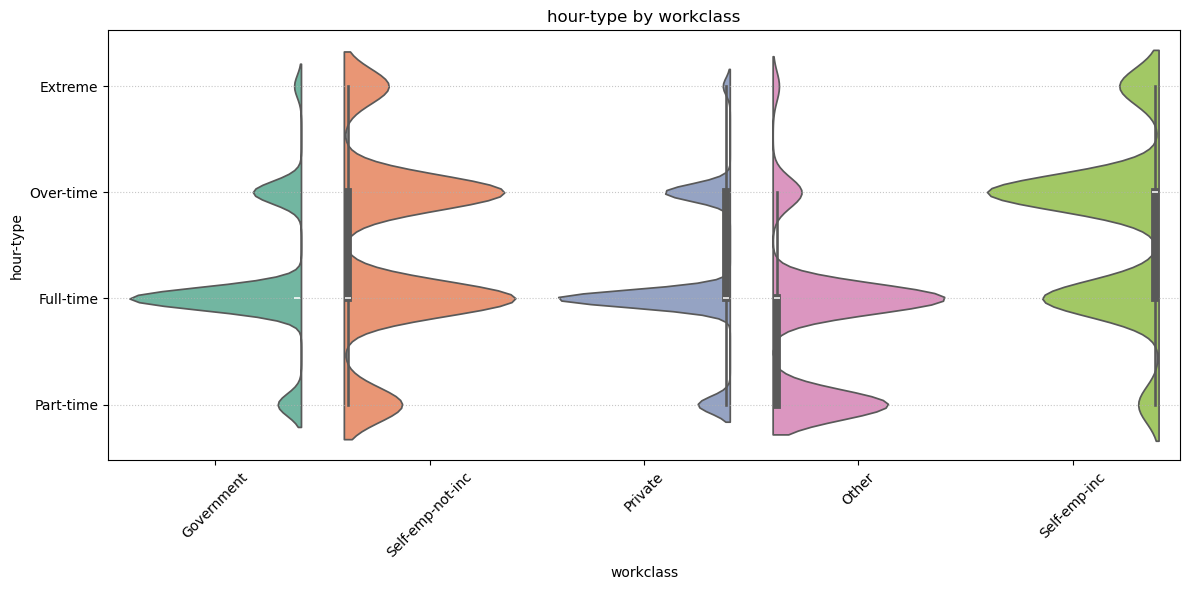

In [1452]:
#checking for cluster in the 'workclass' vs hour-type  plot
numerical_vs_categorical_violinplot('hour-type', 'workclass')

<h2><u>Observations:</h2></u>

- Government: Almost entirely Full-time. The violin is very narrow at Part-time, Over-time, and Extreme, with the median pinned at Full-time.

- Private: Predominantly Full-time, with some Part-time and moderate Over-time, but virtually no Extreme.

- Self-emp-not-inc: Broad distribution across Full-time, Over-time, and some Extreme, indicating varied schedules.

- Self-emp-inc: Right‐skewed with heavy density in Over-time and Extreme, fewer Full-time, minimal Part-time.

- Other (Missing/Without-pay/Never-worked): Highly variable across all bins, suggesting these should be grouped or treated as noisy data.

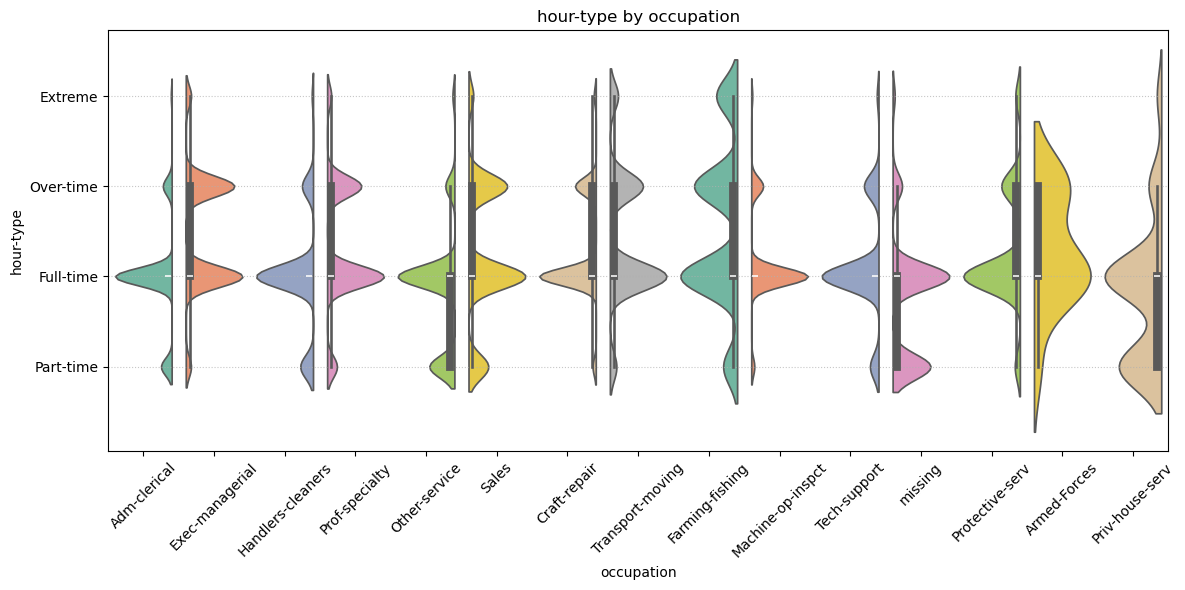

In [1453]:
numerical_vs_categorical_violinplot('hour-type', 'occupation')

<h2><u>Observations:</h2></u>


- Adm-clerical, Handlers-cleaners, Sales, Other-service: these occupations cluster tightly at Full-time, with very narrow tails into Part-time and almost no overtime or extreme hours.

- Exec-managerial & Prof-specialty: there’s a wider spread. The median sits at Full-time, but substantial density extends into Over-time (45–60 hrs) and even the Extreme bin (>60 hrs), reflecting managerial/professional roles with long hours.

- Machine-op-inspct & Tech-support: moderate distribution across Full-time and slight Over-time, with minimal Extreme; they resemble private-sector norms but with slightly more overtime.

- Transport-moving & Protective-serv: these display wider over-time tails (45–70 hrs), indicating shift or emergency work requiring longer hours, with some Extreme outliers.

- Farming-fishing: very right-skewed—strong density in Over-time and heavy Extreme, with the violin bulging most in the 60–80 hr range, capturing peak seasonal demands.

- Armed-Forces & Priv-house-serv: small sample sizes but both show high variability: Armed-Forces has a spread from Part-time (few) up to Extreme, Priv-house-serv clusters around Full-time with a moderate Over-time tail.

- Missing (Unknown occupation): noise across all bins—should likely be grouped as “Unknown” or dropped for modeling.

<h2><u>Implications:</h2></u>


Occupations naturally segment by hour-type:

- Stable 40-hr roles (Adm-clerical, Sales, Other-service, Handlers-cleaners).

- Flexible/overtime roles (Exec-managerial, Prof-specialty, Transport, Protective, Farming).

- Noisy/unknown (missing).

- For clustering, we can encode a feature like occupation_group based on these hour-type patterns (“Administrative,” “Professional,” “Trade,” “Agricultural,” “Unknown”).

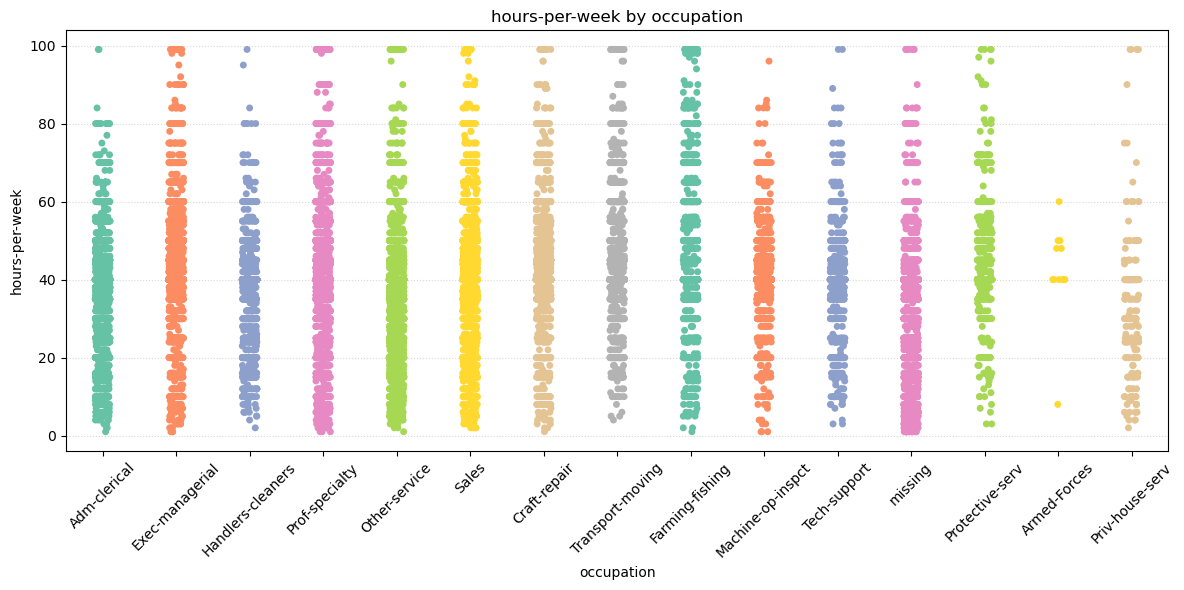

In [ ]:
# Writing a function to plot a numercal vs categorical features using a strip plot
def numerical_vs_categorical_stripplot(numerical_col, categorical_col):
    plt.figure(figsize=(12, 6))
    sns.stripplot(x=categorical_col, y=numerical_col, data=df, jitter=True, hue=categorical_col, palette='Set2')
    plt.title(f'{numerical_col} by {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel(numerical_col)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle=':', alpha=0.5)
    plt.tight_layout()
    plt.show()
# Plotting numerical vs categorical features using strip plots
numerical_vs_categorical_stripplot('hours-per-week', 'occupation')

Observations:
- The most dense occupation in the overtime-extreme hours area is 'Farming-Fishing'
- The most dense oc

<u><h3> Observation :</u></h3>
No strong correlation between the numeric values in the Dataset.

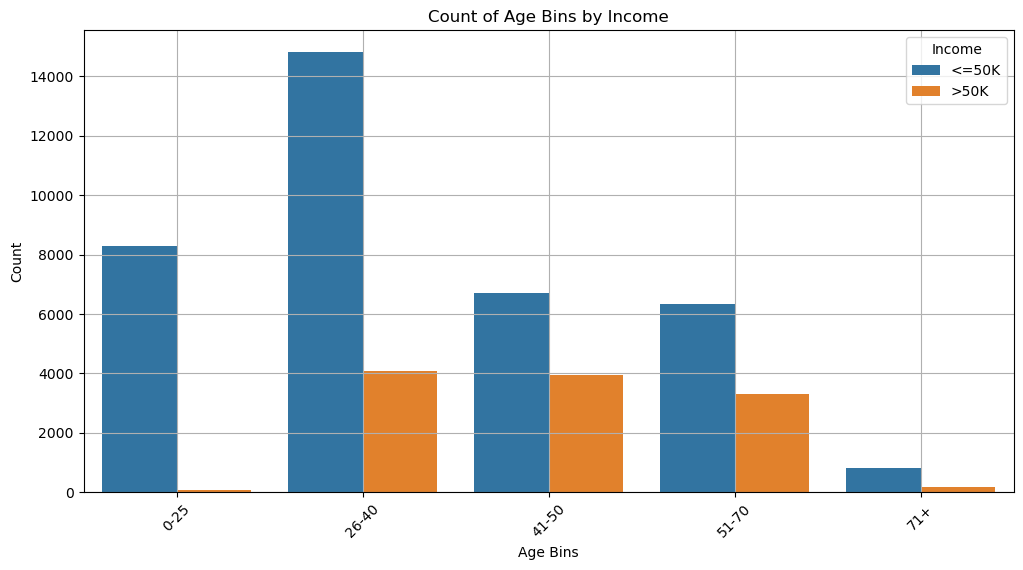

In [ ]:
# Adding age bins to the dataframe
bins = [0, 25, 40, 50, 70, np.inf]
labels = ['0-25', '26-40', '41-50', '51-70', '71+']
df['age_bins'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
# Plotting the age bins
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='age_bins', hue='income')
plt.title('Count of Age Bins by Income')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.grid(True)
plt.show()

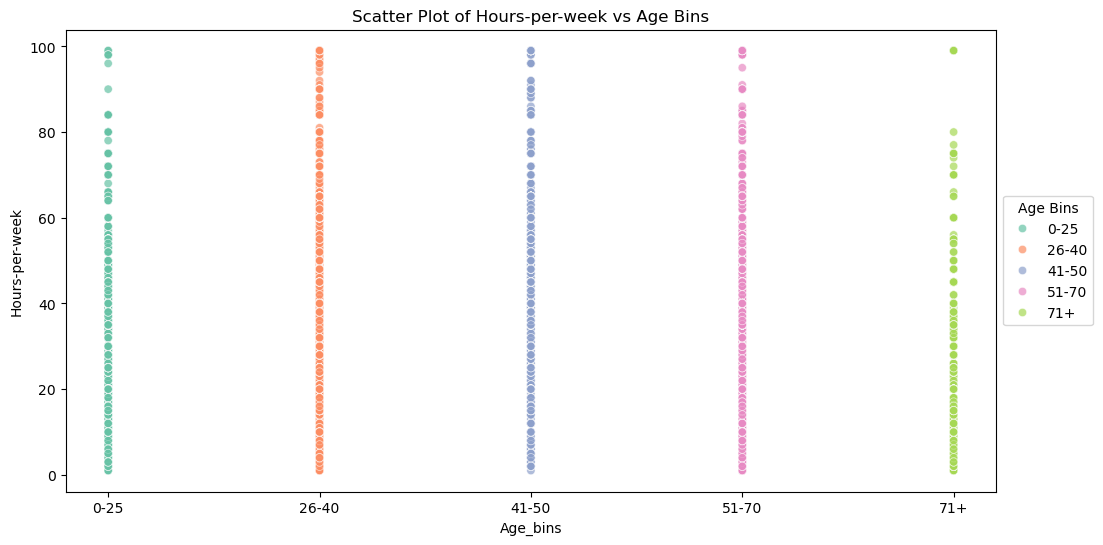

In [ ]:
# Plotting a bar plot for hours-per-week and age columns colored by income
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='age_bins', y='hours-per-week', hue='age_bins',alpha=0.7,palette='Set2')
plt.title('Scatter Plot of Hours-per-week vs Age Bins')
plt.xlabel('Age_bins')
plt.ylabel('Hours-per-week')
plt.legend(title='Age Bins', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## To work with categorical data we need to encode it as a number using one-hot encoding or label-encoding

### Within each column the data is not ordinal, thus we will use one-hot encoding.

In [1457]:
# using 'categorical_columns' to get dummy variables for the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
# Display the first few rows of the encoded DataFrame
df_encoded.head()

,age,education,education-num,capital-gain,capital-loss,hours-per-week,hour-type,education-group,age_bins,workclass_Other,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_missing,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_missing,income_>50K
0,39,Bachelors,13,2174,0,40,Full-time,Bachelor’s or Higher,26-40,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,50,Bachelors,13,0,0,13,Part-time,Bachelor’s or Higher,51-70,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,38,HS-grad,9,0,0,40,Full-time,HS Graduate,26-40,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,53,11th,7,0,0,40,Full-time,Less than HS,51-70,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,28,Bachelors,13,0,0,40,Full-time,Bachelor’s or Higher,26-40,Fal

### Let's calculate the number of outliers using the IQR method and see whether we should drop the outliers

In [ ]:
# Let's write a function to calculate the IQR and print the number of outliers
def calculate_iqr_outliers(df, numeric_columns):
    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Create a mask for outliers
    outlier_mask = (df[numeric_columns] < lower_bound) | (df[numeric_columns] > upper_bound)
    return outlier_mask

In [ ]:
# Removing the outliers using the IQR method
print("IQR outliers:\n", calculate_iqr_outliers(df_encoded, numerical_columns).sum())
# Print the percentage of outliers
outlier_percentage = (calculate_iqr_outliers(df_encoded, numerical_columns).sum()/ len(df_encoded)) * 100
print("\nPercentage of outliers in numeric columns:")
print(outlier_percentage.round(2), "%")

IQR outliers:
 age                 214
education-num      1783
capital-gain       4015
capital-loss       2275
hours-per-week    13425
dtype: int64
Percentage of outliers in numeric columns:
age                0.44
education-num      3.67
capital-gain       8.27
capital-loss       4.68
hours-per-week    27.64
dtype: float64 %


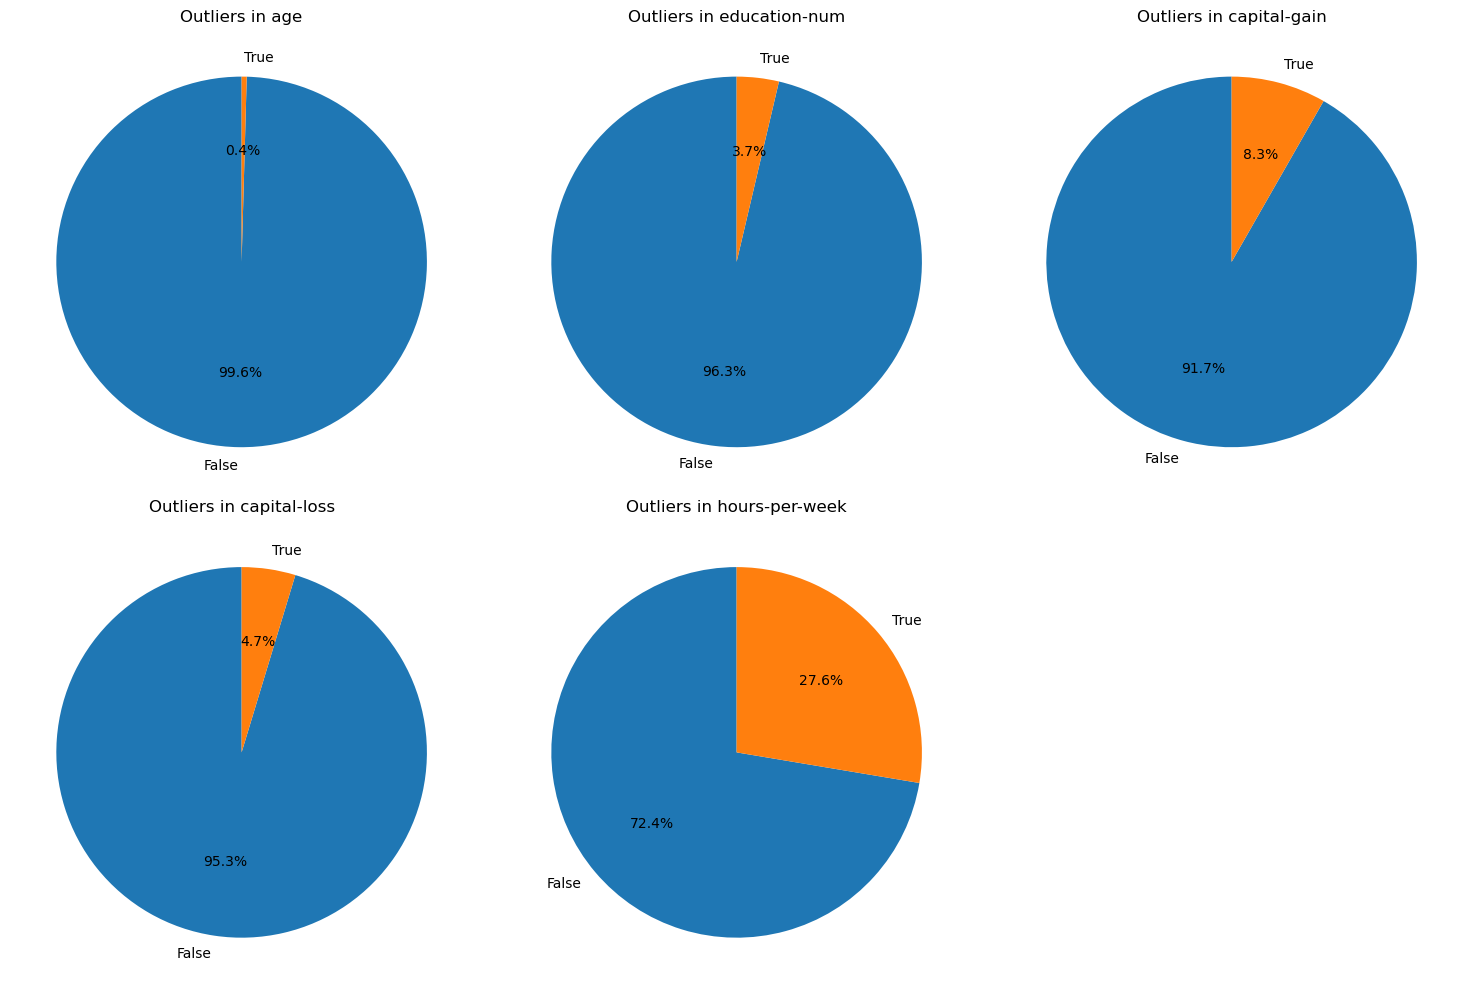

In [ ]:
# Plotting pie chart for every numeric column to see the distribution of outliers in a subplot
plt.figure(figsize=(15, 10))    
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    outlier_counts = calculate_iqr_outliers(df_encoded, numerical_columns)[column].value_counts()
    plt.pie(outlier_counts, labels=outlier_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Outliers in {column}')
plt.tight_layout()
plt.show()


#### We can see the there are a lot of outliers in the 'hours-per-week' column ~ 27%
Removing those columns would change the data. Maybe we can replace those values with the median value


We can see the close to half of the values in 'hours-per-week' are very densely close to the median. Maybe that could explain why there are so many outliers.
_______________________________________________________________________________________________________________________________________

### We will drop all the outliers that are less than 5%
### We will use a log transform to normalize the outliers that are less than 10%
### We will explore the 27% outliers in 'hours-per-week' column 

Number of outliers after removal:
 age                  25
education-num         0
capital-gain       3888
capital-loss       2211
hours-per-week    12802
dtype: int64 rows


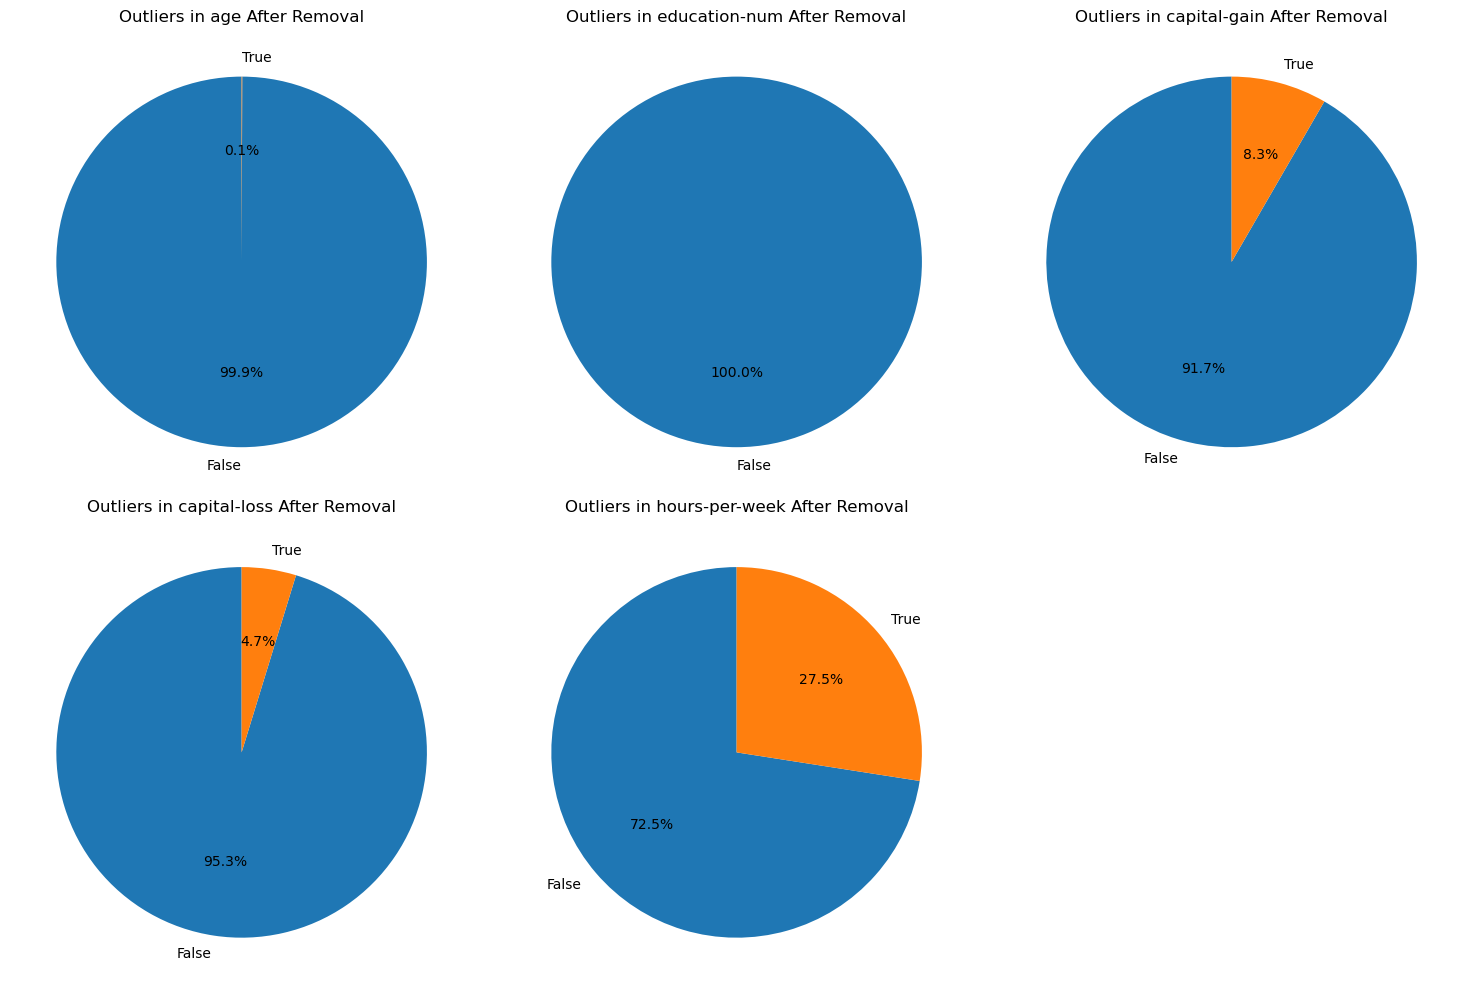

In [ ]:
outlier_mask = calculate_iqr_outliers(df_encoded, numerical_columns)
# Removing the outliers from 'age' ,'educatio-num' columns in the df_encoded DataFrame
df_encoded = df_encoded[~outlier_mask['age'] & ~outlier_mask['education-num']]
# Checking the outliers again
outlier_mask = calculate_iqr_outliers(df_encoded, numerical_columns)
# Display the number of outliers after removal
print("Number of outliers after removal:\n", outlier_mask.sum(), "rows")
# Plotting the pie chart for the outliers after removal
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    outlier_counts = calculate_iqr_outliers(df_encoded, numerical_columns)[column].value_counts()
    plt.pie(outlier_counts, labels=outlier_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Outliers in {column} After Removal')
plt.tight_layout()
plt.show()

Number of outliers after transformation:
 age                  25
education-num         0
capital-gain       3888
capital-loss       2211
hours-per-week    12802
dtype: int64 rows


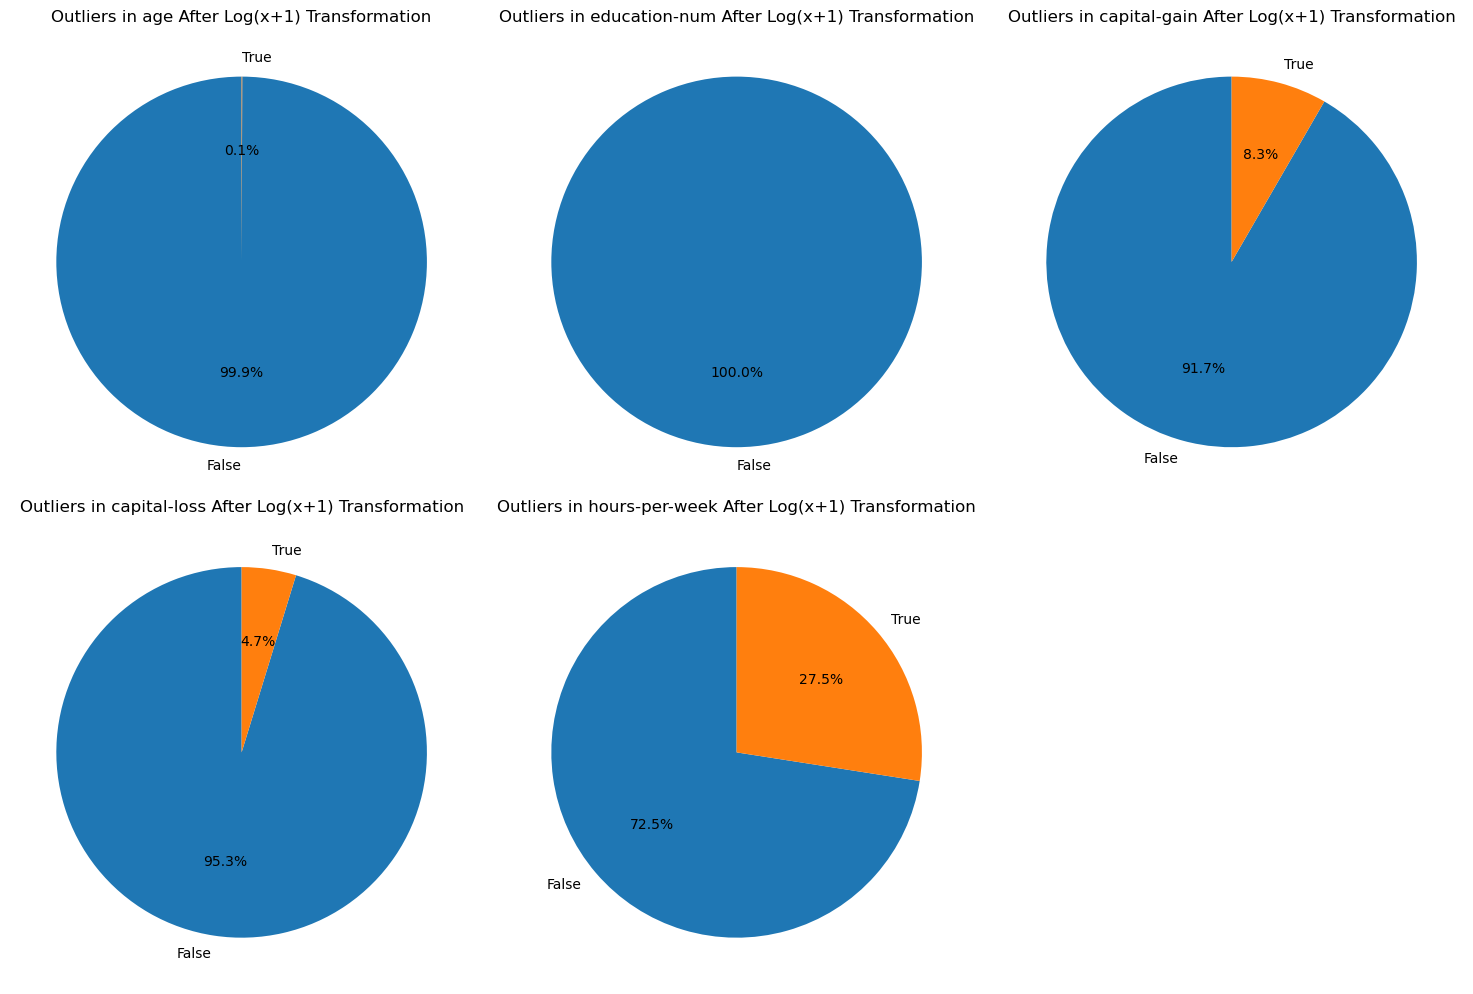

In [ ]:
# Log(1+x) transformation for the 'capital-gain' and 'capital-loss' columns
df_encoded['capital-gain'] = np.log1p(df_encoded['capital-gain'])
df_encoded['capital-loss'] = np.log1p(df_encoded['capital-loss'])
# Recalculate the IQR for the remaining numeric columns
outlier_mask = calculate_iqr_outliers(df_encoded, numerical_columns)
# Display the number of outliers after transformation
print("Number of outliers after transformation:\n", outlier_mask.sum(), "rows")
# Plotting the pie chart for the outliers after transformation
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    outlier_counts = calculate_iqr_outliers(df_encoded, numerical_columns)[column].value_counts()
    plt.pie(outlier_counts, labels=outlier_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Outliers in {column} After Log(x+1) Transformation')
plt.tight_layout()
plt.show()



### The log(1+x) transformation didn't do much...
### We will proceed to another method : Winsorization at the 5th/95th percentiles

Number of outliers after Winsorizing:
 age                  25
education-num         0
capital-gain       3888
capital-loss          0
hours-per-week    12802
dtype: int64


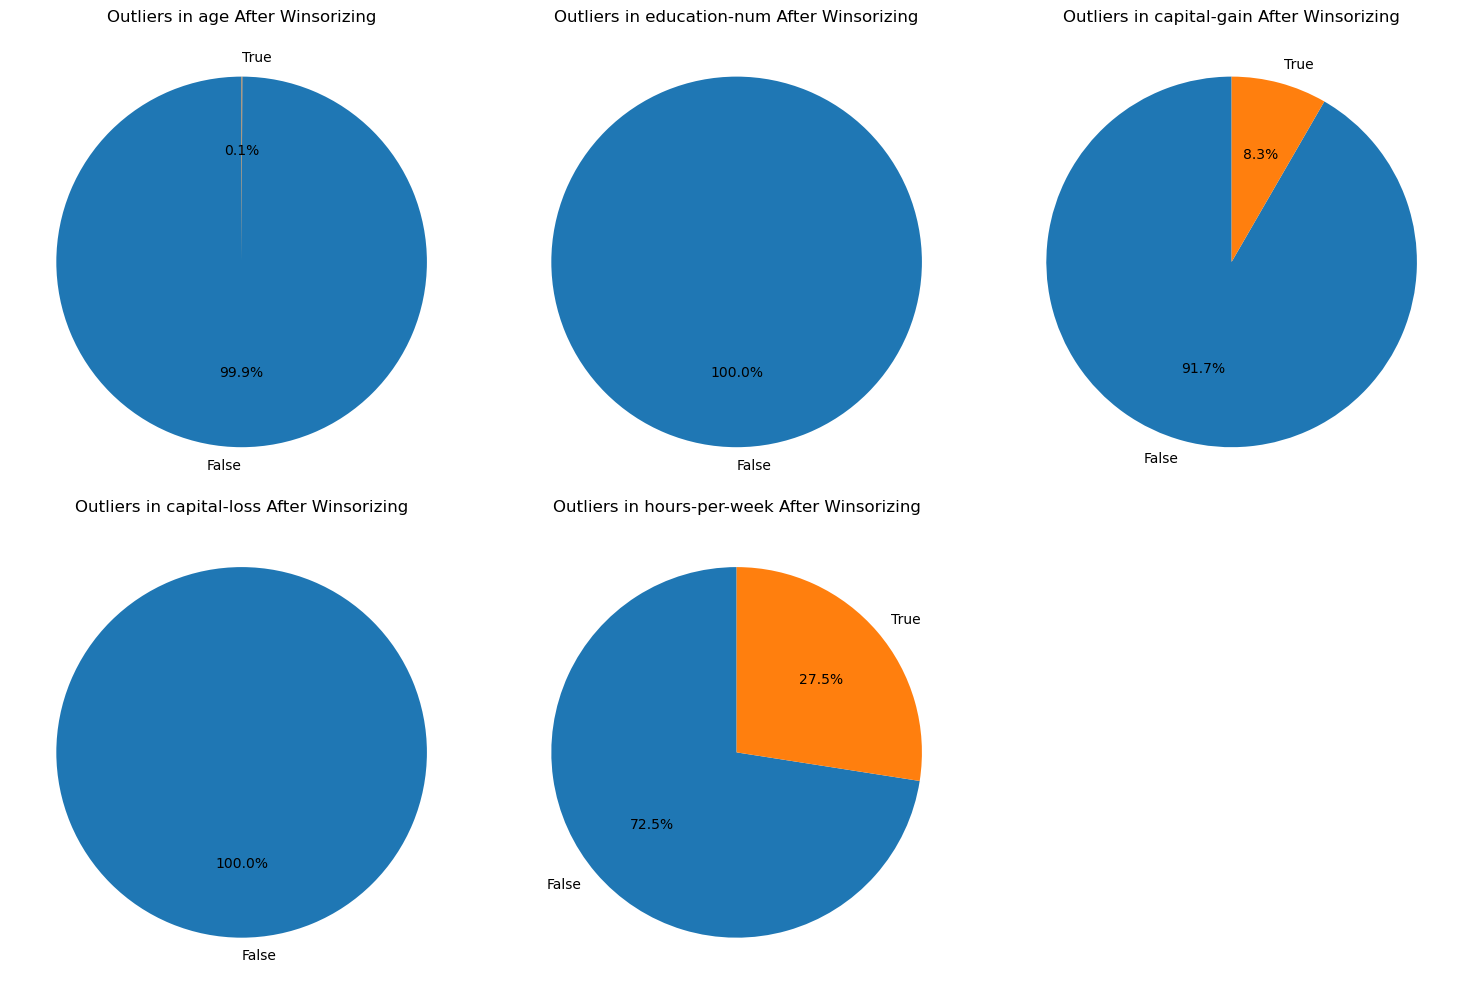

In [ ]:
# Gain thresholds
low_gain, high_gain = df_encoded['capital-gain'].quantile([0.05, 0.95])
# Loss thresholds
low_loss, high_loss = df_encoded['capital-loss'].quantile([0.05, 0.95])
# Apply clipping
df_encoded['capital-gain'] = df_encoded['capital-gain'].clip(lower=low_gain, upper=high_gain)
df_encoded['capital-loss'] = df_encoded['capital-loss'].clip(lower=low_loss, upper=high_loss)

# Checking the outliers after Winsorizing
print("Number of outliers after Winsorizing:\n", calculate_iqr_outliers(df_encoded,numerical_columns).sum())
# Plotting the pie chart for the outliers after Winsorizing
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    outlier_counts = calculate_iqr_outliers(df_encoded, numerical_columns)[column].value_counts()
    plt.pie(outlier_counts, labels=outlier_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Outliers in {column} After Winsorizing')
plt.tight_layout()
plt.show()